# **LIBRERÍAS**

In [ ]:
# !pip install tensorflow

In [ ]:
import os
from math import ceil
from google.colab import drive
import joblib
import warnings
warnings.filterwarnings('ignore')

# Análisis de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Algoritmo de red neuronal FNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

# Mostrar todas las columnas
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

# Montar Google Drive
drive.mount('/content/drive')

# Ruta de la caprte principal del proyecto
path = '/content/drive/My Drive/Colab Notebooks/Algoritmos de ML/Red Neuronal Fútbol Colombiano'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 # **FUNCIONES EXTRAS**

In [ ]:
'''
  CARGAR MODELO Y REALIZAR PREDICCIONES
'''
def load_model_and_predict(new_data, model_filename):
    '''
    Descripción: esta función carga un modelo previamente entrenado desde un
    archivo y realiza una predicción sobre nuevos datos.

    Parámetros:
    new_data: Diccionario con los datos de entrada.
    model_filename: Nombre del archivo del modelo a cargar.

    Returns:
    predicted_new_data_tx: Predicción del modelo
    '''

    # Cargar el modelo desde la ubicación del archivo
    # e imprimir información básica sobre él
    model_loaded = joblib.load(model_filename)

    # Preparar data para el modelo
    inputs = [list(new_data)]

    # Usar modelo para realizar predicciones
    predicted_new_data_tx = model_loaded.predict(inputs)[0]

    return predicted_new_data_tx


'''
  ESTANDARIZACIÓN O NORMALIZACIÓN DE LAS CARACTERÍSTICAS
'''
def stand_norm_data(X, y, norm=True, test_size=0.2):
  if norm:
    # Crear el objeto scaler de NORMALIZACIÓN
    scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
    # Normalizar los datos
    X_norm = scaler.transform(X)
    return train_test_split(X_norm, y, test_size=test_size, random_state=0), scaler

  else:
    # Crear el objeto scaler de ESTANDARIZACIÓN
    scaler = StandardScaler()
    # Estandarizar los datos
    X_std = scaler.fit_transform(X)
    return train_test_split(X_std, y, test_size=test_size, random_state=0), scaler


'''
  Identificar valores atípicos utilizando el método del RANGO INTERCUANTIL (IQR)
'''
def identify_outliers(data, column):
    # Calcular el primer cuartil (Q1)
    Q1 = data[column].quantile(0.25)

    # Calcular el tercer cuartil (Q3)
    Q3 = data[column].quantile(0.75)

    # Calcular el rango intercuartílico (IQR)
    IQR = Q3 - Q1

    # Calcular los límites inferior y superior para identificar valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar los valores atípicos en la columna
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return outliers, lower_bound, upper_bound

# **CONJUNTO DE DATOS, OBJETIVO Y EXPLICACIÓN DE LAS COLUMNAS DEL DATAFRAME**

## a. **df Estadísticas del campeonato**

### a.1 **Dataset original**

In [ ]:
'''
CONCATENAR LOS ARCHIVOS ".csv" DE CADA UNA DE LAS JORNADAS Y SUS ESTADÍSTICAS
'''
def concat_df_jornadas():
  # Listar archivos en una carpeta específica
  path_jor = '{}/Jornadas'.format(path)

  # DataFrame base
  df = pd.DataFrame()

  # Iterar sobre los archivos en el directorio
  for archivo in os.listdir(path_jor):
    # Ruta de un archivo ".csv" en particular
    ruta_archivo = os.path.join(path_jor, archivo)
    # Verificar si "ruta_archivo" es un archivo
    if os.path.isfile(ruta_archivo):
      # Verificar si el archivo es un archivo CSV
      if ruta_archivo[-3:] == 'csv':
        # Concatenar la información de los archivos ".csv"
        df = pd.concat([df, pd.read_csv(ruta_archivo, encoding='latin1', sep=',')], ignore_index=True)

  # Organizar por jornada
  df.sort_values(by='JOR', inplace=True)

  # Setear los indices de manera continua de 0 a 189
  df.reset_index(drop=True, inplace=True)

  # Guardar el DataFrame
  df.to_csv('{}/Modelos/df_base_stats.csv'.format(path), index=False)

  return df

In [ ]:
'''
"DF" CON LAS ESTADÍSTICAS DE LOS PARTIDOS EN CADA JORNADA
'''
update_stats = False
# True = Actualizar las estadísiticas de los partidos
# False = Leer el archivo con las estad´siticas ya extraidas

if update_stats:
  df_stats = concat_df_jornadas()
else:
  df_stats = pd.read_csv('{}/Modelos/df_base_stats.csv'.format(path))

df_stats

,JOR,HOME,AWAY,G_H,G_A,stats_names,stats_match_H,stats_match_A
0,1,Patriotas,Jaguares FC,0,1,"[['Disparos recibidos', 'Tarjetas amarillas', ...","['60.8%', '4', '1', '0', '7', '9', '155', '49'...","['39.2%', '35', '0', '0', '8', '7', '112', '44..."
1,1,Deportivo Pereira,Deportivo Cali,2,2,"[['Disparos recibidos', 'Tarjetas amarillas', ...","['53.5%', '6', '4', '0', '9', '7', '121', '44'...","['46.5%', '14', '3', '0', '7', '10', '112', '4..."
2,1,Once Caldas,Chicó,2,1,"[['Disparos recibidos', 'Tarjetas amarillas', ...","['36.3%', '20', '1', '2', '12', '16', '102', '...","['63.7%', '13', '3', '1', '16', '12', '118', '..."
3,1,Tolima,Fortaleza,1,2,"[['Disparos recibidos', 'Tarjetas amarillas', ...","['63.8%', '5', '3', '0', '10', '11', '129', '5...","['36.2%', '18', '4', '0', '10', '11', '105', '..."
4,1,América de Cali,Rionegro Águilas,0,1,"[['Disparos recibidos', 'Tarjetas amarillas', ...","['65.1%', '6', '1', '0', '9', '9', '142', '31'...","['34.9%', '15', '3', '0', '8', '9', '119', '35..."
...,...,...,...,...,...,...,...,...
185,19,Millonarios,Chicó,3,0,"[['Disparos recibidos', 'Tarjetas amarillas', ...","['47.8%', '7', '0', '0', '6', '5', '119', '53'...","['52.2%', '20', '2', '0', '5', '6', '130', '47..."
186,19,Once Caldas,América de Cali,0,0,"[['Disparos recibidos', 'Tarjetas amarillas', ...","['37.5%', '9', '1', '0', '4', '11', '117', '41...","['62.5%', '9', '0', '0', '8', '4', '106', '33'..."
187,19,Rionegro Águilas,Fortaleza,1,1,"[['Disparos recibidos', 'Tarjetas amarillas', ...","['47%', '13', '0', '0', '16', '8', '140', '56'...","['53%', '12', '1', '0', '8', '16', '139', '31'..."
188,19,Jaguares FC,Santa Fe,1,0,"[['Disparos recibidos', 'Tarjetas amarillas', ...","['38.4%', '22', '0', '0', '11', '8', '126', '5...","['61.6%', '11', '3', '0', '7', '11', '125', '5..."


### a.2 **df por Jornadas** [190 partidos: 10 partidos * 19 jornadas]

In [ ]:
# Extraer estadísticas del equipo local
stats_h = [ i_stat.replace('[', '').replace(']', '').replace("'", '').replace("'", '').split(', ') for i_stat in df_stats['stats_match_H'] ]
# Extraer estadísticas del equipo visitante
stats_a = [ i_stat.replace('[', '').replace(']', '').replace("'", '').replace("'", '').split(', ') for i_stat in df_stats['stats_match_A'] ]

# Nombres de las nuevas columnas para el "df_stats"
names_stats = ['%_POS_BAL', 'DIS_REC', 'TAR_AMA', 'TAR_ROJ', 'FAL_REC', 'FAL_COM', 'PER_D_POS', 'REC_D_POS', 'FUE_DE_JUE', 'DIS_REC_BLO']

# Crear nuevas columnas de estadisticas por equipo en el "DataFarme"
for enu, i_name_col in enumerate(names_stats):
  # 'DIS_REC', 'TAR_AMA', 'TAR_ROJ', 'FAL_REC', 'FAL_COM', 'PER_D_POS', 'REC_D_POS', 'FUE_DE_JUE'
  if (i_name_col != 'DIS_REC_BLO') and (i_name_col != '%_POS_BAL'):
    df_stats['{}_H'.format(i_name_col)] = [ int(i_stats_h[enu]) for i_stats_h in stats_h ]
    df_stats['{}_A'.format(i_name_col)] = [ int(i_stats_a[enu]) for i_stats_a in stats_a ]
  # '%_POS_BAL'
  elif i_name_col == '%_POS_BAL':
    df_stats['{}_H'.format(i_name_col)] = [ float(i_stats_h[enu][:-1]) for i_stats_h in stats_h ]
    df_stats['{}_A'.format(i_name_col)] = [ float(i_stats_a[enu][:-1]) for i_stats_a in stats_a ]
  # 'DIS_REC_BLO'
  else:
    df_stats['{}_H'.format(i_name_col)] = [ int(i_stats_h[enu+2]) for i_stats_h in stats_h ]
    df_stats['{}_A'.format(i_name_col)] = [ int(i_stats_a[enu+2]) for i_stats_a in stats_a ]

# Agreagar estadísticas de tiros al arco (SHO_TAR_x) y tiros afuera (SHO_x)
df_stats['SHO_TAR_H'] = [int(i_sth[-3]) for i_sth in stats_a]
df_stats['SHO_TAR_A'] = [int(i_sta[-2]) for i_sta in stats_h]
df_stats['SHO_H'] = [int(i_sh[-3]) for i_sh in stats_h]
df_stats['SHO_A'] = [int(i_sa[-2]) for i_sa in stats_a]

# Crear columnas de promedio de goles para locales y visitantes con valores NaN
df_stats['AVG_GOAL_H'] = np.nan
df_stats['AVG_GOAL_A'] = np.nan
df_stats['AVG_%_POS_BAL_H'] = np.nan
df_stats['AVG_%_POS_BAL_A'] = np.nan
df_stats['AVG_SHO_TAR_H'] = np.nan
df_stats['AVG_SHO_TAR_A'] = np.nan

# Crear las nuevas columnas de forma vectorizada
df_stats['H_WIN'] = np.where(df_stats['G_H'] > df_stats['G_A'], 1, 0)
df_stats['A_WIN'] = np.where(df_stats['G_H'] < df_stats['G_A'], 1, 0)
df_stats['DRAW'] = np.where(df_stats['G_H'] == df_stats['G_A'], 1, 0)

# Etiqueta del modelo
# df_stats['RESULT'] = np.where(df_stats['G_H'] > df_stats['G_A'], 0, np.where(df_stats['G_H'] == df_stats['G_A'], 1, 2))
df_stats['RESULT'] = np.where(df_stats['G_H'] > df_stats['G_A'], 1, 0)
# 1 = WIN HOME
# 0 = DRAW o WIN AWAY

# Eliminar las columnas originales innecesarias
df_stats.drop(columns=['stats_names', 'stats_match_H', 'stats_match_A'], inplace=True)

# Organizar por jornada y alfabéticamente por nombre del equipo local
df_stats.sort_values(by=['JOR', 'HOME'], inplace=True)

# Re-setear index
df_stats.reset_index(drop=True, inplace=True)

'''
CALCULAR PROMEDIOS POR JORNADA (DE LOCAL Y VISITANTE)
'''
# 'AVG_GOAL_H', 'AVG_GOAL_A', 'AVG_%_POS_BAL_H', 'AVG_%_POS_BAL_A', 'AVG_SHO_TAR_H', 'AVG_SHO_TAR_A'
for i_status in ['HOME', 'AWAY']:
  # Obtener los nombres únicos de los equipos
  for i_team in df_stats[i_status].unique():
    # Obtener los goles en cada jornada de cada equipo cuando el equipo fue local o visitante
    list_goals = df_stats[ df_stats[i_status] == i_team ].groupby(['JOR', 'HOME'])[ str(np.where(i_status=='HOME', 'G_H', 'G_A')) ].sum().to_list()

    # Obtener la posición en cada jornada de cada equipo cuando el equipo fue local o visitante
    list_pos = df_stats[ df_stats[i_status] == i_team ].groupby(['JOR', 'HOME'])[ str(np.where(i_status=='HOME', '%_POS_BAL_H', '%_POS_BAL_A')) ].sum().to_list()

    # Obtener los tiros a puerta en cada jornada de cada equipo cuando el equipo fue local o visitante
    list_shots_tg = df_stats[ df_stats[i_status] == i_team ].groupby(['JOR', 'HOME'])[ str(np.where(i_status=='HOME', 'SHO_TAR_H', 'SHO_TAR_A')) ].sum().to_list()

    if i_status == 'HOME':
      df_stats['AVG_GOAL_H'][df_stats[i_status] == i_team] = [ np.mean(list_goals[ :enu+1 ]).round(1) for enu, i_mean in enumerate(list_goals) ]
      df_stats['AVG_%_POS_BAL_H'][df_stats[i_status] == i_team] = [ np.mean(list_pos[ :enu+1 ]).round(1) for enu, i_mean in enumerate(list_pos) ]
      df_stats['AVG_SHO_TAR_H'][df_stats[i_status] == i_team] = [ np.mean(list_shots_tg[ :enu+1 ]).round(1) for enu, i_mean in enumerate(list_shots_tg) ]
    else:
      df_stats['AVG_GOAL_A'][df_stats[i_status] == i_team] = [ np.mean(list_goals[ :enu+1 ]).round(1) for enu, i_mean in enumerate(list_goals) ];
      df_stats['AVG_%_POS_BAL_A'][df_stats[i_status] == i_team] = [ np.mean(list_pos[ :enu+1 ]).round(1) for enu, i_mean in enumerate(list_pos) ]
      df_stats['AVG_SHO_TAR_A'][df_stats[i_status] == i_team] = [ np.mean(list_shots_tg[ :enu+1 ]).round(1) for enu, i_mean in enumerate(list_shots_tg) ]


In [ ]:
df_stats

,JOR,HOME,AWAY,G_H,G_A,%_POS_BAL_H,%_POS_BAL_A,DIS_REC_H,DIS_REC_A,TAR_AMA_H,TAR_AMA_A,TAR_ROJ_H,TAR_ROJ_A,FAL_REC_H,FAL_REC_A,FAL_COM_H,FAL_COM_A,PER_D_POS_H,PER_D_POS_A,REC_D_POS_H,REC_D_POS_A,FUE_DE_JUE_H,FUE_DE_JUE_A,DIS_REC_BLO_H,DIS_REC_BLO_A,SHO_TAR_H,SHO_TAR_A,SHO_H,SHO_A,AVG_GOAL_H,AVG_GOAL_A,AVG_%_POS_BAL_H,AVG_%_POS_BAL_A,AVG_SHO_TAR_H,AVG_SHO_TAR_A,H_WIN,A_WIN,DRAW,RESULT
0,1,América de Cali,Rionegro Águilas,0,1,65.1,34.9,6,15,1,3,0,0,9,8,9,9,142,119,31,35,5,3,3,2,4,1,8,3,0.0,1.0,65.1,34.9,4.0,1.0,0,1,0,0
1,1,Deportivo Pereira,Deportivo Cali,2,2,53.5,46.5,6,14,4,3,0,0,9,7,7,10,121,112,44,46,1,0,4,2,5,3,5,1,2.0,2.0,53.5,46.5,5.0,3.0,0,0,1,0
2,1,Junior,Atlético Bucaramanga,2,0,62.9,37.1,12,4,1,2,0,0,10,6,6,11,128,102,41,32,1,1,0,2,3,3,1,7,2.0,0.0,62.9,37.1,3.0,3.0,1,0,0,1
3,1,La Equidad,Envigado,0,0,44.2,55.8,9,25,1,4,0,0,9,14,17,9,116,127,43,38,1,1,3,1,6,2,16,6,0.0,0.0,44.2,55.8,6.0,2.0,0,0,1,0
4,1,Millonarios,Medellín,5,0,38.6,61.4,9,13,4,3,0,0,10,16,16,10,122,137,54,52,2,1,0,2,9,1,4,6,5.0,0.0,38.6,61.4,9.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,19,Millonarios,Chicó,3,0,47.8,52.2,7,20,0,2,0,0,6,5,5,6,119,130,53,47,1,0,7,3,4,1,9,3,1.8,0.9,55.7,45.0,5.6,4.1,1,0,0,1
186,19,Nacional,Tolima,3,1,57.1,42.9,10,25,1,3,0,1,9,10,11,10,94,96,49,40,1,0,4,3,10,3,11,3,1.2,1.6,56.9,48.2,5.4,4.3,1,0,0,1
187,19,Once Caldas,América de Cali,0,0,37.5,62.5,9,9,1,0,0,0,4,8,11,4,117,106,41,33,5,2,3,3,2,2,4,4,1.0,0.8,47.6,47.1,4.6,4.7,0,0,1,0
188,19,Patriotas,Pasto,0,3,55.7,44.3,8,13,3,2,0,0,17,15,15,17,104,111,52,39,1,2,3,0,0,5,10,3,0.4,0.7,51.0,43.4,3.6,4.3,0,1,0,0


### a.3 **df Segmentando data por fechas**

In [ ]:
# Se realizará el análisis a partir de la jornada "x" a la 19
num_jornadas = 15

dict_stats = {
    'NAME_TEAM': df_stats['HOME'].sort_values().unique(),

    # 'PJ_H',	'PG_H',	'PE_H',	'PP_H'
    'PJ_H': df_stats[df_stats['JOR'] >= num_jornadas].groupby('HOME')['HOME'].count().values,
    'PG_H': df_stats[df_stats['JOR'] >= num_jornadas].groupby('HOME')['H_WIN'].sum().values,
    'PE_H': df_stats[df_stats['JOR'] >= num_jornadas].groupby('HOME')['DRAW'].sum().values,
    'PP_H': df_stats[df_stats['JOR'] >= num_jornadas].groupby('HOME')['A_WIN'].sum().values,

    'PJ_A': df_stats[df_stats['JOR'] >= num_jornadas].groupby('AWAY')['AWAY'].count().values,
    'PG_A': df_stats[df_stats['JOR'] >= num_jornadas].groupby('AWAY')['A_WIN'].sum().values,
    'PE_A': df_stats[df_stats['JOR'] >= num_jornadas].groupby('AWAY')['DRAW'].sum().values,
    'PP_A': df_stats[df_stats['JOR'] >= num_jornadas].groupby('AWAY')['H_WIN'].sum().values,

    # GF_H	GC_H
    'GF_H': df_stats[df_stats['JOR'] >= num_jornadas].groupby('HOME')['G_H'].sum().values,
    'GC_H': df_stats[df_stats['JOR'] >= num_jornadas].groupby('HOME')['G_A'].sum().values,
    'GF_A': df_stats[df_stats['JOR'] >= num_jornadas].groupby('AWAY')['G_A'].sum().values,
    'GC_A': df_stats[df_stats['JOR'] >= num_jornadas].groupby('AWAY')['G_H'].sum().values
 }

'''
Crear DataFrame temporal
'''
# for i, j in dict_stats.items():
#   print(i, len(j))

df_temp_stats = pd.DataFrame(dict_stats)

# Calcular los puntos de local y visitante
df_temp_stats['PTS_H'] = df_temp_stats.apply(lambda x: x['PG_H']*3 + x['PE_H']*1, axis=1)
df_temp_stats['PTS_A'] = df_temp_stats.apply(lambda x: x['PG_A']*3 + x['PE_A']*1, axis=1)
df_temp_stats['PTS_T'] = df_temp_stats['PTS_H'] + df_temp_stats['PTS_A']

df_temp_stats['PJ_T'] = df_temp_stats['PJ_H'] + df_temp_stats['PJ_A']



def cal_porcentajes(df):
  # Porcentajes de los equipos en condición de local
  df_porcentajes = df[['NAME_TEAM', 'PJ_H',	'PG_H',	'PE_H', 'PP_H']].copy()
  df_porcentajes['%_PG_H'] = df_porcentajes.apply(lambda x: round(x['PG_H'] * 100 / x['PJ_H'], 2), axis=1).copy()
  df_porcentajes['%_PE_H'] = df_porcentajes.apply(lambda x: round(x['PE_H'] * 100 / x['PJ_H'], 2), axis=1).copy()
  df_porcentajes['%_PP_H'] = df_porcentajes.apply(lambda x: round(x['PP_H'] * 100 / x['PJ_H'], 2), axis=1).copy()

  # Porcentajes de los equipos en condición de visitante
  df_porcentajes[['PJ_A',	'PG_A',	'PE_A',	'PP_A']] = df[['PJ_A', 'PG_A', 'PE_A', 'PP_A']].copy()
  df_porcentajes['%_PG_A'] = df_porcentajes.apply(lambda x: round(x['PG_A'] * 100 / x['PJ_A'], 2), axis=1).copy()
  df_porcentajes['%_PE_A'] = df_porcentajes.apply(lambda x: round(x['PE_A'] * 100 / x['PJ_A'], 2), axis=1).copy()
  df_porcentajes['%_PP_A'] = df_porcentajes.apply(lambda x: round(x['PP_A'] * 100 / x['PJ_A'], 2), axis=1).copy()

  return df_porcentajes


# Calcular porcentajes de los partidos de local y visitante
df_porcentajes = cal_porcentajes(df_temp_stats)
df_temp_stats[df_porcentajes.columns.to_list()] = df_porcentajes

# Re-úbicar columnas en posiciones nuevas
columns = df_temp_stats.columns.to_list()
columns_copy = columns.copy()

columns_copy.pop(-14)  # GF_H
columns_copy.pop(-13)  # GF_A
columns_copy.pop(-10)  # PTS_H
columns_copy.pop(-9)  # PTS_A
columns_copy.pop(-8)  # PTS_T
columns_copy.pop(-7)  # PJ_T
columns_copy.pop(-6)  # %_PG_H
columns_copy.pop(-5)  # %_PE_H
columns_copy.pop(-4)  # %_PP_H

columns_copy.insert(1, columns[-8]) # PTS_T
columns_copy.insert(2, columns[-7]) # PJ_T
columns_copy.insert(3, columns[-10])  # PTS_H
columns_copy.insert(8, columns[-14])  # GF_H
columns_copy.insert(9, columns[-13])  # GF_A
columns_copy.insert(10, columns[-6])  # %_PG_H
columns_copy.insert(11, columns[-5])  # %_PE_H
columns_copy.insert(12, columns[-4])  # %_PP_H
columns_copy.insert(13, columns[-9])  # PTS_A

# DataFarme re-organizado
df_temp_stats = df_temp_stats.reindex(columns=columns_copy)

# Ordenar el dataframe por la columna "PTS_T" de mayor a menor
df_temp_stats.sort_values(by='PTS_T', ascending=False, inplace=True)

# Re-setear índices
df_temp_stats.reset_index(drop=True, inplace=True)

In [ ]:
df_temp_stats

,NAME_TEAM,PTS_T,PJ_T,PTS_H,PJ_H,PG_H,PE_H,PP_H,GF_H,GC_H,%_PG_H,%_PE_H,%_PP_H,PTS_A,PJ_A,PG_A,PE_A,PP_A,GF_A,GC_A,%_PG_A,%_PE_A,%_PP_A
0,Millonarios,15,5,9,3,3,0,0,9,3,100.00,0.00,0.00,6,2,2,0,0,5,3,100.00,0.00,0.00
1,Medellín,11,5,4,2,1,1,0,3,2,50.00,50.00,0.00,7,3,2,1,0,6,4,66.67,33.33,0.00
2,La Equidad,10,5,4,3,1,1,1,4,2,33.33,33.33,33.33,6,2,2,0,0,6,2,100.00,0.00,0.00
3,Tolima,9,5,6,2,2,0,0,4,2,100.00,0.00,0.00,3,3,1,0,2,4,5,33.33,0.00,66.67
4,Atlético Bucaramanga,9,5,6,3,2,0,1,5,4,66.67,0.00,33.33,3,2,1,0,1,2,1,50.00,0.00,50.00
5,Deportivo Pereira,8,5,1,2,0,1,1,1,2,0.00,50.00,50.00,7,3,2,1,0,4,1,66.67,33.33,0.00
6,Fortaleza,8,5,3,2,1,0,1,2,2,50.00,0.00,50.00,5,3,1,2,0,3,2,33.33,66.67,0.00
7,Pasto,7,5,0,2,0,0,2,4,6,0.00,0.00,100.00,7,3,2,1,0,4,0,66.67,33.33,0.00
8,Rionegro Águilas,7,5,4,3,1,1,1,5,2,33.33,33.33,33.33,3,2,1,0,1,3,3,50.00,0.00,50.00
9,Santa Fe,7,5,4,2,1,1,0,1,0,50.00,50.00,0.00,3,3,1,0,2,2,4,33.33,0.00,66.67


## b. **df Mapas de calor**

### b.1 **Gráfica discretizada del mapa de calor**

In [ ]:
# Ancho de de la imagen
num_px_col = 800

# Función para crear el dataframe y crear la imagen de una fecha en específico
def graph_img_bin(df, num_div, name_csv):

  # Número de divisiones (# de filas) a tener en cuenta para gráficar cada punto
  num_div = num_div

  # Almacenar la suma de pixeles tomados como blancos en cada división
  list_sum_divisiones = []

  # Iterar sobre el rango de divisiones establecido de columas a sumar
  for i, j in zip(list(range(0, num_px_col, num_div)), list(range(num_div, num_px_col, num_div))):
    # Almacenar las suma de cada división y almacenarla en la lista "list_sum_divisiones"
    list_sum_divisiones.append(df[[i_col for i_col in df.columns[i:j]]].sum().sum())

  # Gráficar
  plt.figure(figsize=(12, 6))
  sns.lineplot(list_sum_divisiones, color='orange')
  plt.gca().set_facecolor('g')
  plt.title('Intensidad de juego de: {}'.format(name_csv[101:-4]))
  plt.xlabel('Cancha')
  plt.ylabel('Intensidad de juego')

  # Agregar asintotas verticales
  plt.axvline(x=400/num_div, color='red', linestyle='--')
  plt.axvline(x=100/num_div, color='blue', linestyle='solid', alpha=0.5)
  plt.axvline(x=700/num_div, color='blue', linestyle='solid', alpha=0.5)

  plt.grid()
  plt.show()

  # Guardar la imagen
  # plt.savefig('/content/{}.png'.format(df))

  return df

### b.2 **Suma de actividad por regiones en** "archivo_bin.csv"

In [ ]:
def sum_por_regiones(df):
  # Ruta del directorio que contiene los archivos discretizados de los mapas e calor
  directorio = '/content/drive/My Drive/Colab Notebooks/Algoritmos de ML/Red Neuronal Fútbol Colombiano/Archivos bin/'

  # Obtener la lista de los nombres de los archivos ".csv" en el directorio
  archivos_bin = os.listdir(directorio)

  # Función personalizada para dividir la cadena y obtener el número
  def obtener_numero(cadena):
      return int(cadena.split('_')[0])

  # Ordena la lista utilizando la función "obtener_numero"
  archivos_bin = sorted(archivos_bin)

  # Ahora ordenar en orden alfabético
  archivos_bin = sorted(archivos_bin, key=obtener_numero)

  dict_model = {'JOR': [], 'HOME': [], 'AWAY': [], 'UMBRAL': [], 'IMG_OF':[],}
                # 'CAMPO_PROPIO [%]': [], 'CAMPO_RIVAL [%]': []}

  '''
  CREAR NUEVAS LLAVES DEL DICCIONARIO "dict_model" DE LAS UMAS DE REGIONES
  '''
  # Divisiones por filas y columnas
  div_row = 4
  div_col = 4

  for i_new_key in range(div_row*div_col):
    dict_model[i_new_key] = []

  # Almacenar los DataFrames de los archivos bin "archivo_bin.csv" (760)
  dict_dfs = {}

  '''
  Iterar sobre cada archivo .csv de loas binarios de
  la transformada inversa obtenidos de cada imagen
  '''
  for enu, i_bin in enumerate(archivos_bin[:2]):

    # Ruta al archivo ".csv" específico
    path_csv = directorio + i_bin

    # Crear DataFrame del "archivo_bin.csv"
    df_bin = pd.read_csv(path_csv, header=None)

    # Gaurdar df dentro del diccionario de df's
    dict_dfs[enu] = df_bin

    '''
    GRÁFICOS DE LA DISCRETIZACIÓN DE LOS MAPAS DE CALOR
    '''
    # graph_img_bin(df=df_bin, num_div=1, name_csv=path_csv)

    '''
    EXTRAER DATA DEL "str" CON EL NOMBRE DEL ARCHIVO "archivo_bin.csv"
    '''
    # String con únicamente la información útil del nombre del archivo
    str_name_file = i_bin[:-4]
    # Ej: str_name_file = '1_Deportivo Pereira_Deportivo Cali_A_bin_065'

    # El nombre del archivo ".csv" solo tiene una coincidencia de cero "0"
    index_cero = np.where(str_name_file[-3:].index('0')==0, -3, -2)

    # Sub-string con únicamente los nombre de los equipos
    names_teams = str_name_file[np.where(str_name_file[1]=='_', 2, 3):index_cero-7].split('_')
    # Ej: names_teams = 'Deportivo Pereira_Deportivo Cali' == ['Deportivo Pereira', 'Deportivo Cali']

    # Equipo al que le pertence el actual "archivo_bin.csv"
    home_or_away = np.where(str_name_file.rfind('_H_') == -1, 0, 1)
    # HOME = 1 -&- AWAY = 0

    '''
    DATA PORCENTUAL
    '''
    # Calcular la posesión del equipo, al que le corresponde el "archivo.csv", en campo propio
    # (Suma de 400 columnas)
    list_ones_own_bin = np.where(home_or_away==1, [i for i in df_bin.columns if i < 400],
                                                [i for i in df_bin.columns if i >= 400])
    sum_ones_own = df_bin[list_ones_own_bin].sum().sum()

    # Calcular la posesión del equipo, al que le corresponde el "archivo.csv", en campo rival
    # (Suma de 400 columnas)
    list_ones_vs_bin = np.where(home_or_away==1, [i for i in df_bin.columns if i >= 400],
                                              [i for i in df_bin.columns if i < 400])
    sum_ones_vs = df_bin[list_ones_vs_bin].sum().sum()

    # Posesión total del equipo cancha completa
    sum_ones_total_bin = sum_ones_own + sum_ones_vs

    # Porcentaje posesión del equipo en campo propio
    por_sum_ones_total_bin = sum_ones_own * 100 / sum_ones_total_bin

    '''
    OBTENER SUMA POR REGIONES DEL DF BIN
    '''
    # Dimensiones de la imagen/df_bin
    width_pixels = 800
    height_pixels = 524

    # Valores inciales para los parámetros de fila para ".iloc"
    delta_pix_row = height_pixels // div_row
    down_row = 0
    up_row = delta_pix_row

    # Lista para almacenar la 32 sumas por cada una de las regiones delimitadas por "row" y "col"
    list_df = []

    # Iterar sobre el rango de filas a obtener ("div_row" filas)
    for i in range(div_row):

      # Valores inciales para los parámetros de columna para ".iloc"
      delta_pix_col = width_pixels // div_col
      down_col = 0
      up_col = delta_pix_col

      # Iterar sobre el rango de columnas a obtener (8 columnas)
      for j in range(0, (div_row*div_col), div_row):
        # Almacenar la suma de la región delimitada por "row" y "col"
        list_df.append(df_bin.iloc[down_row:up_row, down_col:up_col].sum().sum())

        # Pasar a la siguiente región delimitada por las columnas "col"
        up_col, down_col = up_col + delta_pix_col, down_col + delta_pix_col

      # Pasar a la siguiente región delimitada por las filas "row"
      up_row, down_row = up_row + delta_pix_row, down_row + delta_pix_row

    '''
    CREAR ARRAY DIMENSIONAL CON LA SUMA DE UNOS (1's) POR REGIONES
    '''
    # Crear array dimensional numpy a parti de la lista de suma de regiones "list_df"
    arr_df = np.array(list_df)
    # "(div_row * div_col)" filas y 1 columna

    # Re-dimensionar el array uni-dimensional para obtener un arrreglo multidimensional
    arr_df = arr_df.reshape(div_row, div_col)
    # "div_row" filas y "div_col" columnas

    ''' Ejmeplo de: "list_df" y  "arr_df"
    list_df = [962, 1055, 2446, 2261, 2299, 1930, 3148, 753, 1392, 1364, 2120, 1909, 1915, 3004, 1515, 3221, 2530, 2225, 529, 130,
              776, 665, 698, 2176, 682, 2459, 3707, 212, 1329, 388, 348, 1259, 502, 3105, 1470, 3227, 2638, 1559, 1634, 981]

    arr_df = array([[ 962, 1055, 2446, 2261, 2299, 1930, 3148,  753, 1392, 1364],
                    [2120, 1909, 1915, 3004, 1515, 3221, 2530, 2225,  529,  130],
                    [ 776,  665,  698, 2176,  682, 2459, 3707,  212, 1329,  388],
                    [ 348, 1259,  502, 3105, 1470, 3227, 2638, 1559, 1634,  981]])
    '''

    '''
    ALIMENTAR EL DICCIONARIO PARA EL DF "df_model"
    '''
    dict_model['JOR'].append(int(str_name_file[:3].split('_')[0]))
    dict_model['HOME'].append(names_teams[0])
    dict_model['AWAY'].append(names_teams[-1])
    dict_model['UMBRAL'].append(float(str_name_file[index_cero:].replace('0', '0.')))
    dict_model['IMG_OF'].append(home_or_away)
    # dict_model['CAMPO_PROPIO [%]'].append(por_sum_ones_total_bin)
    # dict_model['CAMPO_RIVAL [%]'].append(100 - por_sum_ones_total_bin)

    for enu, i_new_key in enumerate(range(0, div_row*div_col, 4)):
      dict_model[i_new_key].append(list_df[enu])
      dict_model[i_new_key+1].append(list_df[enu + div_col])
      dict_model[i_new_key+2].append(list_df[enu + div_col])
      dict_model[i_new_key+3].append(list_df[enu + div_col])

    '''
    GRAFICAR MAPA DE CALOR DISCRETIZADO
    # '''
    # # Crear un gráfico de matriz de colores
    # plt.imshow(arr_df, cmap='Reds', interpolation='nearest')

    # # Añadir una barra de colores
    # plt.colorbar()

    # # Mostrar el gráfico
    # plt.show()

  df_model = pd.DataFrame(data=dict_model)
  df_model = df_model.round(2)

  # Guardar el archivo ".csv" que se usará como base del modelo
  df_model.to_csv('{}/Modelos/df_model.csv'.format(path), index=False)

  return df_model

In [ ]:
'''
"DF" CON LA INFORMACIÓN DEL MAPA DE CALOR OBTENDIA EN MATLAB
'''
new_read = False
# True = Volver a generar el el archivo ".csv"
# False = Leer el archivo ".csv" guardado en My Drive

if new_read:
  df = pd.read_csv('2_América de Cali_Nacional_A_bin_065.csv')
  df_model = sum_por_regiones(df)
else:
  df_model = pd.read_csv('{}/Modelos/df_model.csv'.format(path))

df_model

,JOR,HOME,AWAY,UMBRAL,IMG_OF,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,América de Cali,Rionegro Águilas,0.10,0,2292,1945,1945,1945,2011,1162,1162,1162,4923,2054,2054,2054,3108,6359,6359,6359
1,1,América de Cali,Rionegro Águilas,0.65,0,0,0,0,0,1,0,0,0,20,2,2,2,4,5,5,5
2,1,América de Cali,Rionegro Águilas,0.10,1,2480,1542,1542,1542,5825,5382,5382,5382,8509,1590,1590,1590,2592,4547,4547,4547
3,1,América de Cali,Rionegro Águilas,0.65,1,1,0,0,0,42,14,14,14,21,2,2,2,8,4,4,4
4,1,Deportivo Pereira,Deportivo Cali,0.10,0,2319,2138,2138,2138,6224,4318,4318,4318,3409,5512,5512,5512,3045,5457,5457,5457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,19,Patriotas,Pasto,0.65,1,29,13,13,13,53,83,83,83,31,14,14,14,0,0,0,0
756,19,Rionegro Águilas,Fortaleza,0.10,0,1954,3753,3753,3753,2215,4432,4432,4432,5507,5744,5744,5744,2292,5879,5879,5879
757,19,Rionegro Águilas,Fortaleza,0.65,0,1,7,7,7,0,12,12,12,37,30,30,30,2,11,11,11
758,19,Rionegro Águilas,Fortaleza,0.10,1,2025,3296,3296,3296,4724,4342,4342,4342,6162,4002,4002,4002,3658,3187,3187,3187


## c. **Unir información de los mapas de calor** (umbral del 0.65) **con las estadísticas del partido**

In [ ]:
'''
  Umbral:
  0.65: Expectro de tonos más rojos
  0.1: Expectro más amplio
'''
umbral_model = 0.65
df_model[df_model['UMBRAL'] == umbral_model]

,JOR,HOME,AWAY,UMBRAL,IMG_OF,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,1,América de Cali,Rionegro Águilas,0.65,0,0,0,0,0,1,0,0,0,20,2,2,2,4,5,5,5
3,1,América de Cali,Rionegro Águilas,0.65,1,1,0,0,0,42,14,14,14,21,2,2,2,8,4,4,4
5,1,Deportivo Pereira,Deportivo Cali,0.65,0,14,0,0,0,9,12,12,12,16,30,30,30,26,46,46,46
7,1,Deportivo Pereira,Deportivo Cali,0.65,1,0,13,13,13,0,32,32,32,8,49,49,49,0,2,2,2
9,1,Junior,Atlético Bucaramanga,0.65,0,13,0,0,0,2,2,2,2,5,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,19,Once Caldas,América de Cali,0.65,1,0,0,0,0,0,20,20,20,0,0,0,0,0,0,0,0
753,19,Patriotas,Pasto,0.65,0,1,0,0,0,1,11,11,11,37,19,19,19,2,24,24,24
755,19,Patriotas,Pasto,0.65,1,29,13,13,13,53,83,83,83,31,14,14,14,0,0,0,0
757,19,Rionegro Águilas,Fortaleza,0.65,0,1,7,7,7,0,12,12,12,37,30,30,30,2,11,11,11


In [ ]:
# DataFrame con solo los datos del mapa de calor del equipo local con un umbral de "umbral_model"
df_model_copy = df_model[ (df_model['UMBRAL'] == umbral_model) & (df_model['IMG_OF'] == 1) ].copy()
df_model_copy.reset_index(drop=True, inplace=True)

# Renombrar las columnas
df_model_copy.rename(columns={'0': '0_H',	'1': '1_H',	'2': '2_H',	'3': '3_H',	'4': '4_H',	'5': '5_H',	'6': '6_H',	'7': '7_H',	'8': '8_H',
                              '9': '9_H',	'10': '10_H',	'11': '11_H',	'12': '12_H',	'13': '13_H',	'14': '14_H',	'15': '15_H'}, inplace=True)

# Agregar las columnas del mapa de calor del equipo visitante
for i_new_col in range(16):
  df_model_copy['{}_A'.format(i_new_col)] = df_model[str(i_new_col)][ (df_model['UMBRAL'] == umbral_model) & (df_model['IMG_OF'] == 0) ].values

# Agregar las columnas de las estadísticas de cada partido. EJ:
# df.columns[3:] = ['G_H', 'G_A', '%_POS_BAL_H', '%_POS_BAL_A', 'DIS_REC_H', 'DIS_REC_A', 'TAR_AMA_H', 'TAR_AMA_A', 'TAR_ROJ_H',
#                   'TAR_ROJ_A', 'FAL_REC_H', 'FAL_REC_A', 'FAL_COM_H', 'FAL_COM_A', 'PER_D_POS_H', 'PER_D_POS_A', 'REC_D_POS_H',
#                   'REC_D_POS_A', 'FUE_DE_JUE_H', 'FUE_DE_JUE_A', 'DIS_REC_BLO_H', 'DIS_REC_BLO_A', 'SHO_TAR_H', 'SHO_TAR_A',
#                   'SHO_H', 'SHO_A', 'AVG_GOAL_H', 'AVG_GOAL_A', 'H_WIN', 'A_WIN', 'DRAW', 'RESULT']
for i_col_df in df_stats.columns[3:]:
  df_model_copy[i_col_df] = df_stats[i_col_df].values

df_model_copy.drop(columns=['IMG_OF', 'UMBRAL'], inplace=True)

In [ ]:
df_model_copy

,JOR,HOME,AWAY,0_H,1_H,2_H,3_H,4_H,5_H,6_H,7_H,8_H,9_H,10_H,11_H,12_H,13_H,14_H,15_H,0_A,1_A,2_A,3_A,4_A,5_A,6_A,7_A,8_A,9_A,10_A,11_A,12_A,13_A,14_A,15_A,G_H,G_A,%_POS_BAL_H,%_POS_BAL_A,DIS_REC_H,DIS_REC_A,TAR_AMA_H,TAR_AMA_A,TAR_ROJ_H,TAR_ROJ_A,FAL_REC_H,FAL_REC_A,FAL_COM_H,FAL_COM_A,PER_D_POS_H,PER_D_POS_A,REC_D_POS_H,REC_D_POS_A,FUE_DE_JUE_H,FUE_DE_JUE_A,DIS_REC_BLO_H,DIS_REC_BLO_A,SHO_TAR_H,SHO_TAR_A,SHO_H,SHO_A,AVG_GOAL_H,AVG_GOAL_A,AVG_%_POS_BAL_H,AVG_%_POS_BAL_A,AVG_SHO_TAR_H,AVG_SHO_TAR_A,H_WIN,A_WIN,DRAW,RESULT
0,1,América de Cali,Rionegro Águilas,1,0,0,0,42,14,14,14,21,2,2,2,8,4,4,4,0,0,0,0,1,0,0,0,20,2,2,2,4,5,5,5,0,1,65.1,34.9,6,15,1,3,0,0,9,8,9,9,142,119,31,35,5,3,3,2,4,1,8,3,0.0,1.0,65.1,34.9,4.0,1.0,0,1,0,0
1,1,Deportivo Pereira,Deportivo Cali,0,13,13,13,0,32,32,32,8,49,49,49,0,2,2,2,14,0,0,0,9,12,12,12,16,30,30,30,26,46,46,46,2,2,53.5,46.5,6,14,4,3,0,0,9,7,7,10,121,112,44,46,1,0,4,2,5,3,5,1,2.0,2.0,53.5,46.5,5.0,3.0,0,0,1,0
2,1,Junior,Atlético Bucaramanga,1,36,36,36,49,59,59,59,76,32,32,32,0,1,1,1,13,0,0,0,2,2,2,2,5,0,0,0,0,1,1,1,2,0,62.9,37.1,12,4,1,2,0,0,10,6,6,11,128,102,41,32,1,1,0,2,3,3,1,7,2.0,0.0,62.9,37.1,3.0,3.0,1,0,0,1
3,1,La Equidad,Envigado,8,36,36,36,0,44,44,44,36,0,0,0,3,0,0,0,4,2,2,2,0,0,0,0,30,42,42,42,12,104,104,104,0,0,44.2,55.8,9,25,1,4,0,0,9,14,17,9,116,127,43,38,1,1,3,1,6,2,16,6,0.0,0.0,44.2,55.8,6.0,2.0,0,0,1,0
4,1,Millonarios,Medellín,15,20,20,20,21,25,25,25,8,0,0,0,1,1,1,1,0,0,0,0,2,0,0,0,1,7,7,7,0,0,0,0,5,0,38.6,61.4,9,13,4,3,0,0,10,16,16,10,122,137,54,52,2,1,0,2,9,1,4,6,5.0,0.0,38.6,61.4,9.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,19,Millonarios,Chicó,1,27,27,27,13,13,13,13,12,0,0,0,7,1,1,1,4,6,6,6,18,32,32,32,3,22,22,22,0,6,6,6,3,0,47.8,52.2,7,20,0,2,0,0,6,5,5,6,119,130,53,47,1,0,7,3,4,1,9,3,1.8,0.9,55.7,45.0,5.6,4.1,1,0,0,1
186,19,Nacional,Tolima,2,14,14,14,29,66,66,66,44,15,15,15,37,29,29,29,2,0,0,0,0,0,0,0,0,2,2,2,2,0,0,0,3,1,57.1,42.9,10,25,1,3,0,1,9,10,11,10,94,96,49,40,1,0,4,3,10,3,11,3,1.2,1.6,56.9,48.2,5.4,4.3,1,0,0,1
187,19,Once Caldas,América de Cali,0,0,0,0,0,20,20,20,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,8,39,39,39,5,12,12,12,0,0,37.5,62.5,9,9,1,0,0,0,4,8,11,4,117,106,41,33,5,2,3,3,2,2,4,4,1.0,0.8,47.6,47.1,4.6,4.7,0,0,1,0
188,19,Patriotas,Pasto,29,13,13,13,53,83,83,83,31,14,14,14,0,0,0,0,1,0,0,0,1,11,11,11,37,19,19,19,2,24,24,24,0,3,55.7,44.3,8,13,3,2,0,0,17,15,15,17,104,111,52,39,1,2,3,0,0,5,10,3,0.4,0.7,51.0,43.4,3.6,4.3,0,1,0,0


## d. **Objetivo y explicación de las columnas del DataFrame**

**Objetivo:**
* Desarrollar un modelo de aprendizaje automático de clasificación para predecir los resultados de los cuadrangulares finales del fútbol profesional colombiano.

**Explicación de las columnas del Dataframe:**

In [ ]:
df_model_copy

,JOR,HOME,AWAY,0_H,1_H,2_H,3_H,4_H,5_H,6_H,7_H,8_H,9_H,10_H,11_H,12_H,13_H,14_H,15_H,0_A,1_A,2_A,3_A,4_A,5_A,6_A,7_A,8_A,9_A,10_A,11_A,12_A,13_A,14_A,15_A,G_H,G_A,%_POS_BAL_H,%_POS_BAL_A,DIS_REC_H,DIS_REC_A,TAR_AMA_H,TAR_AMA_A,TAR_ROJ_H,TAR_ROJ_A,FAL_REC_H,FAL_REC_A,FAL_COM_H,FAL_COM_A,PER_D_POS_H,PER_D_POS_A,REC_D_POS_H,REC_D_POS_A,FUE_DE_JUE_H,FUE_DE_JUE_A,DIS_REC_BLO_H,DIS_REC_BLO_A,SHO_TAR_H,SHO_TAR_A,SHO_H,SHO_A,AVG_GOAL_H,AVG_GOAL_A,AVG_%_POS_BAL_H,AVG_%_POS_BAL_A,AVG_SHO_TAR_H,AVG_SHO_TAR_A,H_WIN,A_WIN,DRAW,RESULT
0,1,América de Cali,Rionegro Águilas,1,0,0,0,42,14,14,14,21,2,2,2,8,4,4,4,0,0,0,0,1,0,0,0,20,2,2,2,4,5,5,5,0,1,65.1,34.9,6,15,1,3,0,0,9,8,9,9,142,119,31,35,5,3,3,2,4,1,8,3,0.0,1.0,65.1,34.9,4.0,1.0,0,1,0,0
1,1,Deportivo Pereira,Deportivo Cali,0,13,13,13,0,32,32,32,8,49,49,49,0,2,2,2,14,0,0,0,9,12,12,12,16,30,30,30,26,46,46,46,2,2,53.5,46.5,6,14,4,3,0,0,9,7,7,10,121,112,44,46,1,0,4,2,5,3,5,1,2.0,2.0,53.5,46.5,5.0,3.0,0,0,1,0
2,1,Junior,Atlético Bucaramanga,1,36,36,36,49,59,59,59,76,32,32,32,0,1,1,1,13,0,0,0,2,2,2,2,5,0,0,0,0,1,1,1,2,0,62.9,37.1,12,4,1,2,0,0,10,6,6,11,128,102,41,32,1,1,0,2,3,3,1,7,2.0,0.0,62.9,37.1,3.0,3.0,1,0,0,1
3,1,La Equidad,Envigado,8,36,36,36,0,44,44,44,36,0,0,0,3,0,0,0,4,2,2,2,0,0,0,0,30,42,42,42,12,104,104,104,0,0,44.2,55.8,9,25,1,4,0,0,9,14,17,9,116,127,43,38,1,1,3,1,6,2,16,6,0.0,0.0,44.2,55.8,6.0,2.0,0,0,1,0
4,1,Millonarios,Medellín,15,20,20,20,21,25,25,25,8,0,0,0,1,1,1,1,0,0,0,0,2,0,0,0,1,7,7,7,0,0,0,0,5,0,38.6,61.4,9,13,4,3,0,0,10,16,16,10,122,137,54,52,2,1,0,2,9,1,4,6,5.0,0.0,38.6,61.4,9.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,19,Millonarios,Chicó,1,27,27,27,13,13,13,13,12,0,0,0,7,1,1,1,4,6,6,6,18,32,32,32,3,22,22,22,0,6,6,6,3,0,47.8,52.2,7,20,0,2,0,0,6,5,5,6,119,130,53,47,1,0,7,3,4,1,9,3,1.8,0.9,55.7,45.0,5.6,4.1,1,0,0,1
186,19,Nacional,Tolima,2,14,14,14,29,66,66,66,44,15,15,15,37,29,29,29,2,0,0,0,0,0,0,0,0,2,2,2,2,0,0,0,3,1,57.1,42.9,10,25,1,3,0,1,9,10,11,10,94,96,49,40,1,0,4,3,10,3,11,3,1.2,1.6,56.9,48.2,5.4,4.3,1,0,0,1
187,19,Once Caldas,América de Cali,0,0,0,0,0,20,20,20,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,8,39,39,39,5,12,12,12,0,0,37.5,62.5,9,9,1,0,0,0,4,8,11,4,117,106,41,33,5,2,3,3,2,2,4,4,1.0,0.8,47.6,47.1,4.6,4.7,0,0,1,0
188,19,Patriotas,Pasto,29,13,13,13,53,83,83,83,31,14,14,14,0,0,0,0,1,0,0,0,1,11,11,11,37,19,19,19,2,24,24,24,0,3,55.7,44.3,8,13,3,2,0,0,17,15,15,17,104,111,52,39,1,2,3,0,0,5,10,3,0.4,0.7,51.0,43.4,3.6,4.3,0,1,0,0


* `JOR`: Número de jornada (de 1 a 19)
* `HOME`: Nombre del equipo local
* `AWAY`: Nombre del equipo visitante
* `0_H`: Presencia del equipo local en zona defensiva
* `1_H`: Presencia del equipo local en zona defensiva
* `2_H`: Presencia del equipo local en zona defensiva
* `3_H`: Presencia del equipo local en zona defensiva
* `4_H`: Presencia del equipo local en zona defensiva-media
* `5_H`: Presencia del equipo local en zona defensiva-media
* `6_H`: Presencia del equipo local en zona defensiva-media
* `7_H`: Presencia del equipo local en zona defensiva-media
* `8_H`: Presencia del equipo local en zona media-ofensiva
* `9_H`: Presencia del equipo local en zona media-ofensiva
* `10_H`: Presencia del equipo local en zona media-ofensiva
* `11_H`: Presencia del equipo local en zona media-ofensiva
* `12_H`: Presencia del equipo local en zona ofensiva
* `13_H`: Presencia del equipo local en zona ofensiva
* `14_H`: Presencia del equipo local en zona ofensiva
* `15_H`: Presencia del equipo local en zona ofensiva
* `0_A`: Presencia del equipo visitante en zona ofensiva
* `1_A`: Presencia del equipo visitante en zona ofensiva
* `2_A`: Presencia del equipo visitante en zona ofensiva
* `3_A`: Presencia del equipo visitante en zona ofensiva
* `4_A`: Presencia del equipo visitante en zona ofensiva-media
* `5_A`: Presencia del equipo visitante en zona ofensiva-media
* `6_A`: Presencia del equipo visitante en zona ofensiva-media
* `7_A`: Presencia del equipo visitante en zona ofensiva-media
* `8_A`: Presencia del equipo visitante en zona media-defensiva
* `9_A`: Presencia del equipo visitante en zona media-defensiva
* `10_A`: Presencia del equipo visitante en zona media-defensiva
* `11_A`: Presencia del equipo visitante en zona media-defensiva
* `12_A`: Presencia del equipo visitante en zona defensiva
* `13_A`: Presencia del equipo visitante en zona defensiva
* `14_A`: Presencia del equipo visitante en zona defensiva
* `15_A`: Presencia del equipo visitante en zona defensiva
* `G_H`: # goles del equipo local
* `G_A`: # goles del equipo visitante
* `%_POS_BAL_H`: Posesión de balón del equipo local
* `%_POS_BAL_A`: Posesión de balón del equipo visitante
* `DIS_REC_H`: Disparos rechazados del equipo local
* `DIS_REC_A`: Disparos rechazados del equipo visitante
* `TAR_AMA_H`: Tarjetas amarillas del quipo local
* `TAR_AMA_A`: Tarjetas amarillas del quipo visitante
* `TAR_ROJ_H`: Tarjetas rojas del quipo local
* `TAR_ROJ_A`: Tarjetas rojas del quipo visitante
* `FAL_REC_H`: Faltas recibidas del quipo local
* `FAL_REC_A`: Faltas recibidas del quipo visitante
* `FAL_COM_H`: Faltas cometidas del quipo local
* `FAL_COM_A`: Faltas cometidas del quipo visitante
* `PER_D_POS_H`: Perdidas de posesión de balón del quipo local
* `PER_D_POS_A`: Perdidas de posesión de balón del quipo visitante
* `REC_D_POS_H`: Recuperación de balón del quipo local
* `REC_D_POS_A`: Recuperación de balón del quipo visitante
* `FUE_DE_JUE_H`: Fueras de juego del quipo local
* `FUE_DE_JUE_A`: Fueras de juego del quipo visitante
* `DIS_REC_BLO_H`: Disparos recibidos bloqueados del quipo local
* `DIS_REC_BLO_A`: Disparos recibidos bloqueados del quipo visitante
* `SHO_TAR_H`:Disparos a puerta del quipo local
* `SHO_TAR_A`:Disparos a puerta del quipo visitante
* `SHO_H`: Disparos del quipo local
* `SHO_A`: Disparos del quipo visitante
* `AVG_GOAL_H`: Promedio de gol del quipo local
* `AVG_GOAL_A`: Promedio de gol del quipo visitante
* `AVG_%_POS_BAL_H`: Promedio de posesión de balón del quipo local
* `AVG_%_POS_BAL_A`: Promedio de posesión de balón del quipo visitante
* `AVG_SHO_TAR_H`: Promedio de tiros a puerta del quipo local
* `AVG_SHO_TAR_A`: Promedio de tiros a puerta del quipo visitante
* `H_WIN`: ¿Ganó el equipo local? (0: No; 1: Si)
* `A_WIN`: ¿Ganó el equipo visitante? (0: No; 1: Si)
* `DRAW`: ¿Empate? (0: No; 1: Si)
* `RESUL`: Resultado final. **ETIQUETA BINARIA (1: Ganó el local; 0: Ganó o empató el equipos visitante**)

# **DESCRIPCIÓN DEL DATAFRAME**

In [ ]:
df_model_copy

,JOR,HOME,AWAY,0_H,1_H,2_H,3_H,4_H,5_H,6_H,7_H,8_H,9_H,10_H,11_H,12_H,13_H,14_H,15_H,0_A,1_A,2_A,3_A,4_A,5_A,6_A,7_A,8_A,9_A,10_A,11_A,12_A,13_A,14_A,15_A,G_H,G_A,%_POS_BAL_H,%_POS_BAL_A,DIS_REC_H,DIS_REC_A,TAR_AMA_H,TAR_AMA_A,TAR_ROJ_H,TAR_ROJ_A,FAL_REC_H,FAL_REC_A,FAL_COM_H,FAL_COM_A,PER_D_POS_H,PER_D_POS_A,REC_D_POS_H,REC_D_POS_A,FUE_DE_JUE_H,FUE_DE_JUE_A,DIS_REC_BLO_H,DIS_REC_BLO_A,SHO_TAR_H,SHO_TAR_A,SHO_H,SHO_A,AVG_GOAL_H,AVG_GOAL_A,AVG_%_POS_BAL_H,AVG_%_POS_BAL_A,AVG_SHO_TAR_H,AVG_SHO_TAR_A,H_WIN,A_WIN,DRAW,RESULT
0,1,América de Cali,Rionegro Águilas,1,0,0,0,42,14,14,14,21,2,2,2,8,4,4,4,0,0,0,0,1,0,0,0,20,2,2,2,4,5,5,5,0,1,65.1,34.9,6,15,1,3,0,0,9,8,9,9,142,119,31,35,5,3,3,2,4,1,8,3,0.0,1.0,65.1,34.9,4.0,1.0,0,1,0,0
1,1,Deportivo Pereira,Deportivo Cali,0,13,13,13,0,32,32,32,8,49,49,49,0,2,2,2,14,0,0,0,9,12,12,12,16,30,30,30,26,46,46,46,2,2,53.5,46.5,6,14,4,3,0,0,9,7,7,10,121,112,44,46,1,0,4,2,5,3,5,1,2.0,2.0,53.5,46.5,5.0,3.0,0,0,1,0
2,1,Junior,Atlético Bucaramanga,1,36,36,36,49,59,59,59,76,32,32,32,0,1,1,1,13,0,0,0,2,2,2,2,5,0,0,0,0,1,1,1,2,0,62.9,37.1,12,4,1,2,0,0,10,6,6,11,128,102,41,32,1,1,0,2,3,3,1,7,2.0,0.0,62.9,37.1,3.0,3.0,1,0,0,1
3,1,La Equidad,Envigado,8,36,36,36,0,44,44,44,36,0,0,0,3,0,0,0,4,2,2,2,0,0,0,0,30,42,42,42,12,104,104,104,0,0,44.2,55.8,9,25,1,4,0,0,9,14,17,9,116,127,43,38,1,1,3,1,6,2,16,6,0.0,0.0,44.2,55.8,6.0,2.0,0,0,1,0
4,1,Millonarios,Medellín,15,20,20,20,21,25,25,25,8,0,0,0,1,1,1,1,0,0,0,0,2,0,0,0,1,7,7,7,0,0,0,0,5,0,38.6,61.4,9,13,4,3,0,0,10,16,16,10,122,137,54,52,2,1,0,2,9,1,4,6,5.0,0.0,38.6,61.4,9.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,19,Millonarios,Chicó,1,27,27,27,13,13,13,13,12,0,0,0,7,1,1,1,4,6,6,6,18,32,32,32,3,22,22,22,0,6,6,6,3,0,47.8,52.2,7,20,0,2,0,0,6,5,5,6,119,130,53,47,1,0,7,3,4,1,9,3,1.8,0.9,55.7,45.0,5.6,4.1,1,0,0,1
186,19,Nacional,Tolima,2,14,14,14,29,66,66,66,44,15,15,15,37,29,29,29,2,0,0,0,0,0,0,0,0,2,2,2,2,0,0,0,3,1,57.1,42.9,10,25,1,3,0,1,9,10,11,10,94,96,49,40,1,0,4,3,10,3,11,3,1.2,1.6,56.9,48.2,5.4,4.3,1,0,0,1
187,19,Once Caldas,América de Cali,0,0,0,0,0,20,20,20,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,8,39,39,39,5,12,12,12,0,0,37.5,62.5,9,9,1,0,0,0,4,8,11,4,117,106,41,33,5,2,3,3,2,2,4,4,1.0,0.8,47.6,47.1,4.6,4.7,0,0,1,0
188,19,Patriotas,Pasto,29,13,13,13,53,83,83,83,31,14,14,14,0,0,0,0,1,0,0,0,1,11,11,11,37,19,19,19,2,24,24,24,0,3,55.7,44.3,8,13,3,2,0,0,17,15,15,17,104,111,52,39,1,2,3,0,0,5,10,3,0.4,0.7,51.0,43.4,3.6,4.3,0,1,0,0


In [ ]:
df_model_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 71 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   JOR              190 non-null    int64  
 1   HOME             190 non-null    object 
 2   AWAY             190 non-null    object 
 3   0_H              190 non-null    int64  
 4   1_H              190 non-null    int64  
 5   2_H              190 non-null    int64  
 6   3_H              190 non-null    int64  
 7   4_H              190 non-null    int64  
 8   5_H              190 non-null    int64  
 9   6_H              190 non-null    int64  
 10  7_H              190 non-null    int64  
 11  8_H              190 non-null    int64  
 12  9_H              190 non-null    int64  
 13  10_H             190 non-null    int64  
 14  11_H             190 non-null    int64  
 15  12_H             190 non-null    int64  
 16  13_H             190 non-null    int64  
 17  14_H            

* No existen valores nulos

In [ ]:
calss_0 = df_model_copy.groupby('RESULT').size()[0]
calss_1 = df_model_copy.groupby('RESULT').size()[1]

print('Número de eventos donde la clase fue < Ganó el local: '\
       '{} >\nNúmero de eventos donde la clase fue < No ganó el local: {} >'.format(calss_0, calss_1))

Número de eventos donde la clase fue < Ganó el local: 106 >
Número de eventos donde la clase fue < No ganó el local: 84 >


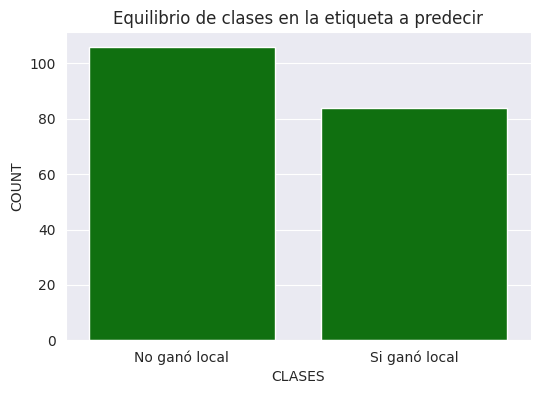

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=['No ganó local', 'Si ganó local'], y=[calss_0, calss_1], color='g')
plt.title('Equilibrio de clases en la etiqueta a predecir')
plt.xlabel('CLASES')
plt.ylabel('COUNT')
plt.show()

* Existe un pequeño desequilibrio entre las dos clases de la etiqueta del conjunto de datos

In [ ]:
# Lista con las columnas del DataFrame
df_col = df_model_copy.columns.to_list()

# Descripción de cada columna
desc_cols = {}

# Número de filas y columnas del dataframe del conjunto de datos
num_rows = df_model_copy.shape[0]
num_cols = df_model_copy.shape[1]

# Iterar sobre cada una de las columnas del DF
for i_col in df_model_copy.columns:
  num_valores_unicos = df_model_copy[i_col].nunique()
  valores_unicos = df_model_copy[i_col].unique()
  num_val_nulls = df_model_copy[i_col].isnull().sum()
  porcentaje_nulls = round(num_val_nulls*100/num_rows, 2)
  tipo_dato = df_model_copy[i_col].dtype

  # Guardar las características de cada columna
  desc_cols[i_col] = {'NUM_VALORES_ÚNICOS': num_valores_unicos, 'LIST_VALORES_ÚNICOS': valores_unicos,
                      'NUM_VALORES_NULOS': num_val_nulls, '[%]_VALORES_NULOS': porcentaje_nulls,
                      'TIPO_DATO': tipo_dato}


'''
DATAFRAME CON LA INFROMACIÓN DE LA DESCRIPCIÓN DE CADA COLUMNA:
  - Número de valores únicos.
  - Lista de valores únicos.
  - Número de valores nulos.
'''
df_descrpcion = pd.DataFrame(desc_cols)
df_descrpcion = df_descrpcion.T.sort_values(by=['NUM_VALORES_ÚNICOS', 'NUM_VALORES_NULOS'])

df_descrpcion.head(35)

,NUM_VALORES_ÚNICOS,LIST_VALORES_ÚNICOS,NUM_VALORES_NULOS,[%]_VALORES_NULOS,TIPO_DATO
H_WIN,2,"[0, 1]",0,0.0,int64
A_WIN,2,"[1, 0]",0,0.0,int64
DRAW,2,"[0, 1]",0,0.0,int64
RESULT,2,"[0, 1]",0,0.0,int64
TAR_ROJ_H,3,"[0, 2, 1]",0,0.0,int64
TAR_ROJ_A,3,"[0, 1, 2]",0,0.0,int64
G_A,5,"[1, 2, 0, 3, 4]",0,0.0,int64
G_H,6,"[0, 2, 5, 3, 1, 4]",0,0.0,int64
TAR_AMA_H,7,"[1, 4, 3, 2, 0, 5, 6]",0,0.0,int64
FUE_DE_JUE_A,8,"[3, 0, 1, 2, 8, 4, 5, 6]",0,0.0,int64


# **LIMPIEZA Y PROCESAMIENTO**

In [ ]:
# Valores duplicados
df_model_copy.duplicated().sum()

0

In [ ]:
# Columnas numéricas
col_num = df_model_copy.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
'''Asimetría:
Valores negativos = Distribución con sesgo y asimetría negativa o hacia la izquierda
Valores positivos = Distribución con sesgo y asimetría positiva o hacia la derecha
Valores cercanos a cero = Distribución Simétrica
'''

# Columnas con asimetria positiva (o hacia la derecha) o negativa (o hacia la izquierda)
col_skew = [ i for i in zip(col_num, df_model_copy[col_num].skew().to_list()) if i[1]>=1 or i[1]<=-1 ]
col_skew

[('0_H', 2.7260552086851635),
 ('1_H', 2.3562740745217647),
 ('2_H', 2.3562740745217647),
 ('3_H', 2.3562740745217647),
 ('4_H', 1.9192929890616541),
 ('5_H', 1.4137315106118666),
 ('6_H', 1.4137315106118666),
 ('7_H', 1.4137315106118666),
 ('8_H', 1.0919368045294482),
 ('9_H', 1.7434363676792708),
 ('10_H', 1.7434363676792708),
 ('11_H', 1.7434363676792708),
 ('12_H', 2.130764047741633),
 ('13_H', 2.208228120421793),
 ('14_H', 2.208228120421793),
 ('15_H', 2.208228120421793),
 ('0_A', 2.579100781538684),
 ('1_A', 1.8686167995698442),
 ('2_A', 1.8686167995698442),
 ('3_A', 1.8686167995698442),
 ('4_A', 1.7245054524173289),
 ('5_A', 1.7664263305897805),
 ('6_A', 1.7664263305897805),
 ('7_A', 1.7664263305897805),
 ('8_A', 1.5104990005895356),
 ('12_A', 1.6571444322178406),
 ('13_A', 1.6417522282350725),
 ('14_A', 1.6417522282350725),
 ('15_A', 1.6417522282350725),
 ('TAR_ROJ_H', 2.3005002109620305),
 ('TAR_ROJ_A', 2.174812643744205),
 ('FUE_DE_JUE_H', 1.63804058480288),
 ('FUE_DE_JUE_A',

## a. **Gráficar columnas con asimetría**

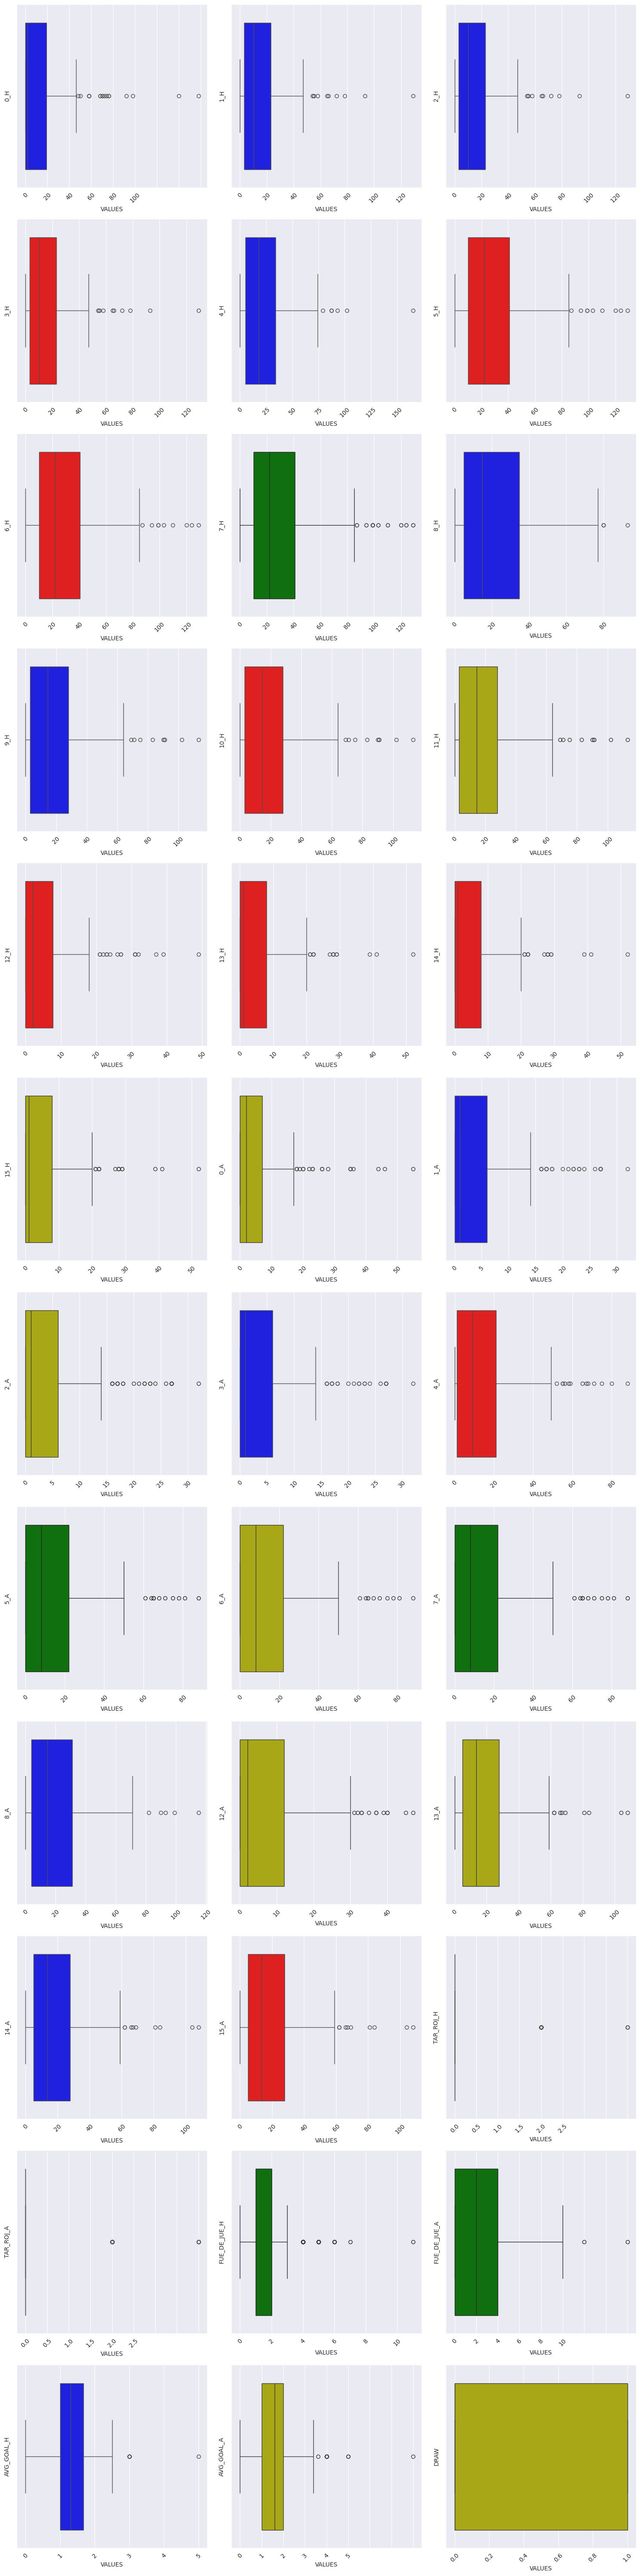

In [ ]:
# Calcular el número de subplots necesarios
num_plots = len(col_skew)
# Calccular el número de filas necesarios
num_rows = (num_plots // 3) + (1 if num_plots % 3 > 0 else 0)

# Crear la figura y los subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

# Colores
colores = ['r', 'g', 'b', 'y']

# Iterar sobre las columnas y crear los boxplots en cada subplot
for idx, i_col in enumerate(col_skew):
  color = np.random.randint(0, len(colores))
  row_idx = idx // 3
  col_idx = idx % 3
  sns.boxplot(x=df_model_copy[i_col[0]], ax=axes[row_idx, col_idx], color=colores[color])
  axes[row_idx, col_idx].set_ylabel(i_col[0])
  axes[row_idx, col_idx].set_xlabel('VALUES')
  axes[row_idx, col_idx].set_xticklabels(axes[row_idx, col_idx].get_xticklabels(), rotation=45)

# Ajustar automáticamente el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los subplots
plt.show()

* Abordar el problema de asimetria de las columnas:
'0_H', '1_H', '2_H', '3_H', '4_H', '5_H', '6_H', '7_H', '8_H', '9_H', '10_H', '11_H', '12_H', '13_H', '14_H', '15_H', '0_A', '1_A', '2_A', '3_A', '4_A', '5_A', '6_A', '7_A', '8_A', '12_A', '13_A', '14_A' y '15_A'.
* Las demas columnas con asimetría no se consideran un problema sus valores atípicos.

In [ ]:
for i_zonas in [ '0_H', '1_H', '2_H', '3_H', '4_H', '5_H', '6_H', '7_H', '8_H', '9_H', '10_H', '11_H', '12_H', '13_H', '14_H', '15_H',
                  '0_A', '1_A', '2_A', '3_A', '4_A', '5_A', '6_A', '7_A', '8_A', '12_A', '13_A', '14_A', '15_A' ]:

  outliers, lower_bound, upper_bound = identify_outliers(df_model_copy, i_zonas)

  # Reemplazar los valores atípicos por el valor de la media
  df_model_copy[i_zonas] = np.where((df_model_copy[i_zonas] < lower_bound) | (df_model_copy[i_zonas] > upper_bound), df_model_copy[i_zonas].mean(), df_model_copy[i_zonas])

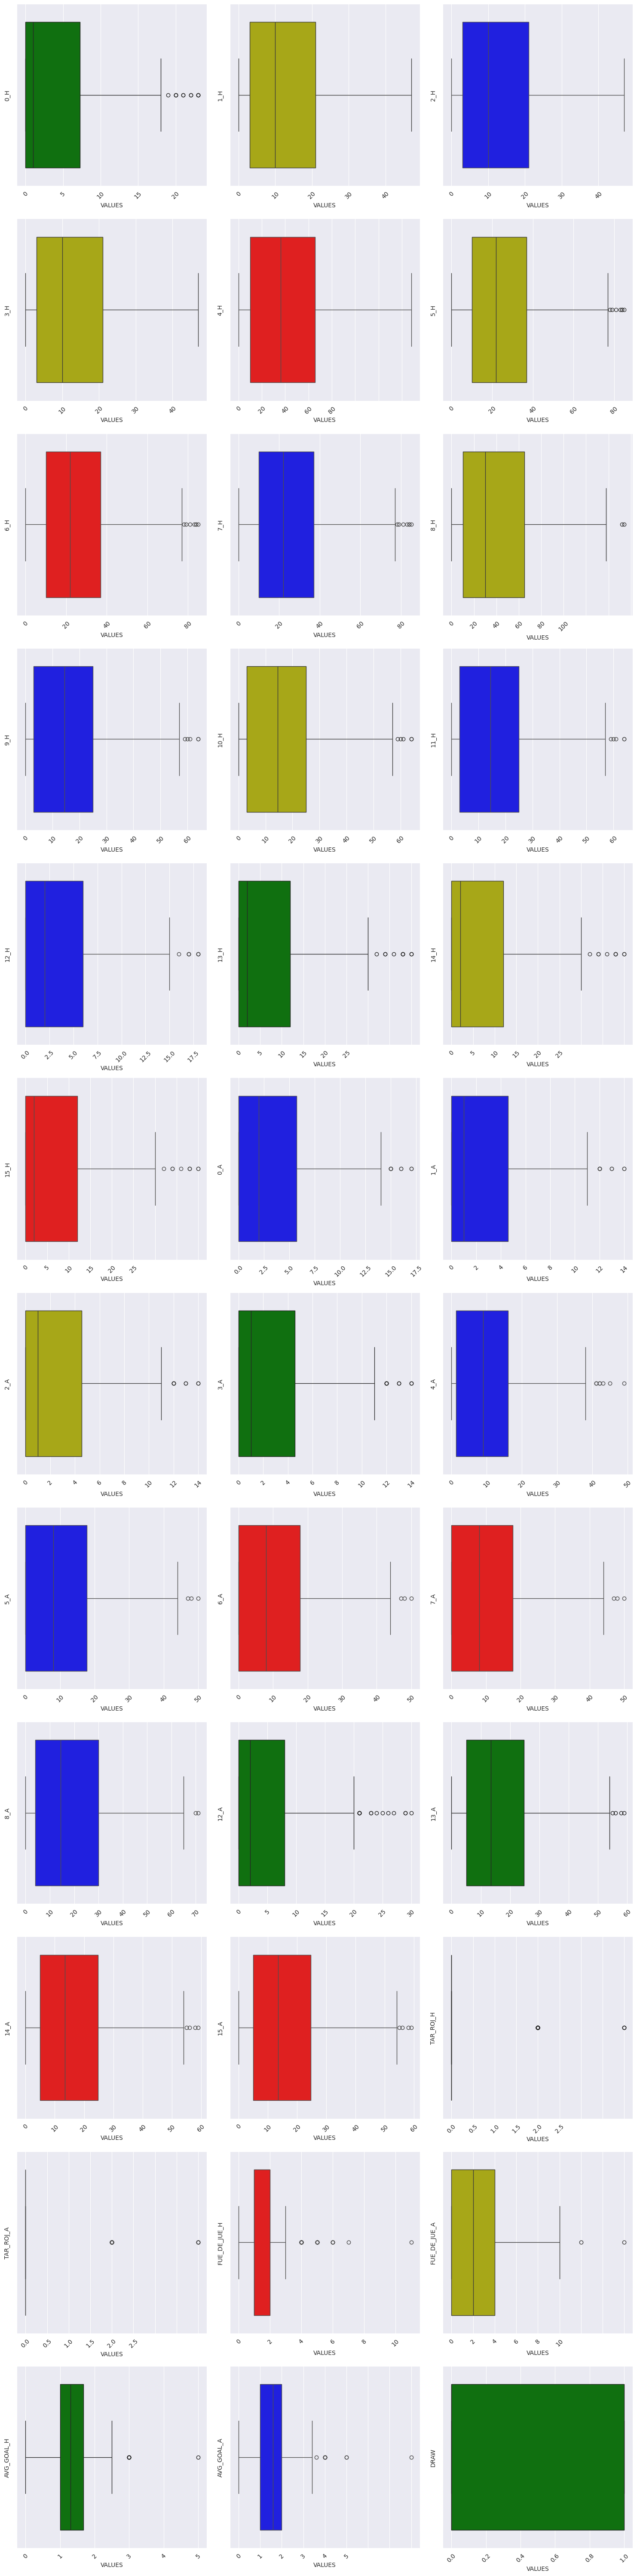

In [ ]:
'''
  OBSERVAR DE NUEVO LOS BOXPLOT DE LAS COLUMNAS CON ASIMETRÍA POSITIVA O NEGATIVA
'''

# Calcular el númerop de subplots necesarios
num_plots = len(col_skew)
# Calccular el número de filas necesarios
num_rows = (num_plots // 3) + (1 if num_plots % 3 > 0 else 0)

# Crear la figura y los subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

# Colores
colores = ['r', 'g', 'b', 'y']

# Iterar sobre las columnas y crear los boxplots en cada subplot
for idx, i_col in enumerate(col_skew):
  color = np.random.randint(0, len(colores))
  row_idx = idx // 3
  col_idx = idx % 3
  sns.boxplot(x=df_model_copy[i_col[0]], ax=axes[row_idx, col_idx], color=colores[color])
  axes[row_idx, col_idx].set_ylabel(i_col[0])
  axes[row_idx, col_idx].set_xlabel('VALUES')
  axes[row_idx, col_idx].set_xticklabels(axes[row_idx, col_idx].get_xticklabels(), rotation=45)

# Ajustar automáticamente el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar los subplots
plt.show()

* La asimetría mejoró obteniendo rangos de funcionamiento de cada columna más compactos

## b. **Gráficar historigramas de columnas con un número de valores únicos menor 18**

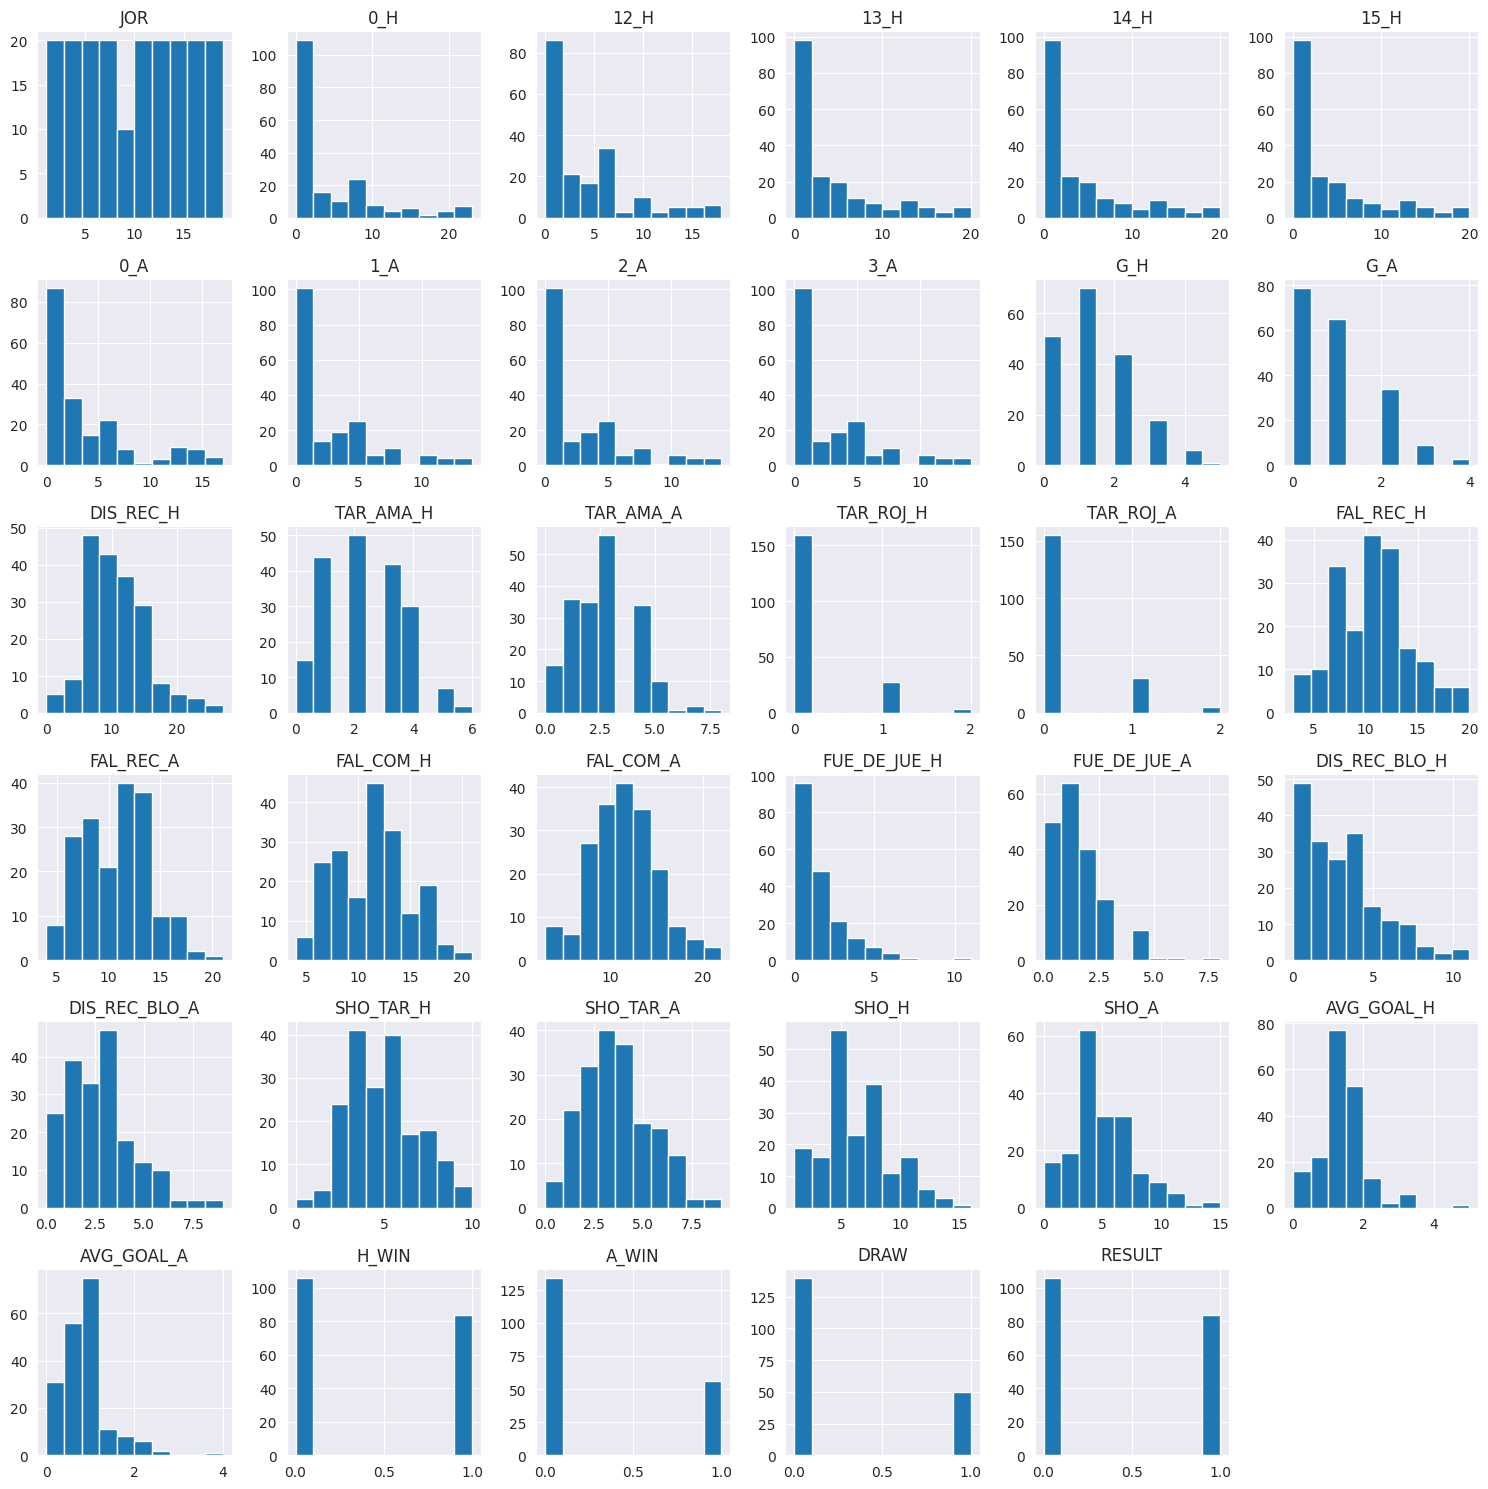

In [ ]:
'''
  Gráficar las columnas con 18 o menos valores únicos
'''
df_model_copy[[ i for i in df_col if df_model_copy[i].nunique()<=25 ]].hist(figsize=(15, 15))
plt.ylabel('COUNT')
plt.xlabel('VALUES')
plt.tight_layout()
plt.show()

* La anterior gráfica respalda la desición de no abordar los valores atipicos de las columnas faltntes que presentan asimetría.
* Se observan valores de las columnas dentro de unos rangos lógicos y esperados

# **REDE NEURONAL FeedForward (FNN)**

In [ ]:
# Recordar la estructura del "DF" base para el model
df_model_copy

,JOR,HOME,AWAY,0_H,1_H,2_H,3_H,4_H,5_H,6_H,7_H,8_H,9_H,10_H,11_H,12_H,13_H,14_H,15_H,0_A,1_A,2_A,3_A,4_A,5_A,6_A,7_A,8_A,9_A,10_A,11_A,12_A,13_A,14_A,15_A,G_H,G_A,%_POS_BAL_H,%_POS_BAL_A,DIS_REC_H,DIS_REC_A,TAR_AMA_H,TAR_AMA_A,TAR_ROJ_H,TAR_ROJ_A,FAL_REC_H,FAL_REC_A,FAL_COM_H,FAL_COM_A,PER_D_POS_H,PER_D_POS_A,REC_D_POS_H,REC_D_POS_A,FUE_DE_JUE_H,FUE_DE_JUE_A,DIS_REC_BLO_H,DIS_REC_BLO_A,SHO_TAR_H,SHO_TAR_A,SHO_H,SHO_A,AVG_GOAL_H,AVG_GOAL_A,AVG_%_POS_BAL_H,AVG_%_POS_BAL_A,AVG_SHO_TAR_H,AVG_SHO_TAR_A,H_WIN,A_WIN,DRAW,RESULT
0,1,América de Cali,Rionegro Águilas,1.000000,0.0,0.0,0.0,42.0,14.0,14.0,14.0,21.0,2.0,2.0,2.0,8.000000,4.000000,4.000000,4.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0,2,2,2,4.0,5.000000,5.000000,5.000000,0,1,65.1,34.9,6,15,1,3,0,0,9,8,9,9,142,119,31,35,5,3,3,2,4,1,8,3,0.0,1.0,65.1,34.9,4.0,1.0,0,1,0,0
1,1,Deportivo Pereira,Deportivo Cali,0.000000,13.0,13.0,13.0,0.0,32.0,32.0,32.0,8.0,49.0,49.0,49.0,0.000000,2.000000,2.000000,2.000000,14.0,0.0,0.0,0.0,9.0,12.0,12.0,12.0,16.0,30,30,30,26.0,46.000000,46.000000,46.000000,2,2,53.5,46.5,6,14,4,3,0,0,9,7,7,10,121,112,44,46,1,0,4,2,5,3,5,1,2.0,2.0,53.5,46.5,5.0,3.0,0,0,1,0
2,1,Junior,Atlético Bucaramanga,1.000000,36.0,36.0,36.0,49.0,59.0,59.0,59.0,76.0,32.0,32.0,32.0,0.000000,1.000000,1.000000,1.000000,13.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,5.0,0,0,0,0.0,1.000000,1.000000,1.000000,2,0,62.9,37.1,12,4,1,2,0,0,10,6,6,11,128,102,41,32,1,1,0,2,3,3,1,7,2.0,0.0,62.9,37.1,3.0,3.0,1,0,0,1
3,1,La Equidad,Envigado,8.000000,36.0,36.0,36.0,0.0,44.0,44.0,44.0,36.0,0.0,0.0,0.0,3.000000,0.000000,0.000000,0.000000,4.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,30.0,42,42,42,12.0,19.589474,19.589474,19.589474,0,0,44.2,55.8,9,25,1,4,0,0,9,14,17,9,116,127,43,38,1,1,3,1,6,2,16,6,0.0,0.0,44.2,55.8,6.0,2.0,0,0,1,0
4,1,Millonarios,Medellín,15.000000,20.0,20.0,20.0,21.0,25.0,25.0,25.0,8.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,7,7,7,0.0,0.000000,0.000000,0.000000,5,0,38.6,61.4,9,13,4,3,0,0,10,16,16,10,122,137,54,52,2,1,0,2,9,1,4,6,5.0,0.0,38.6,61.4,9.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,19,Millonarios,Chicó,1.000000,27.0,27.0,27.0,13.0,13.0,13.0,13.0,12.0,0.0,0.0,0.0,7.000000,1.000000,1.000000,1.000000,4.0,6.0,6.0,6.0,18.0,32.0,32.0,32.0,3.0,22,22,22,0.0,6.000000,6.000000,6.000000,3,0,47.8,52.2,7,20,0,2,0,0,6,5,5,6,119,130,53,47,1,0,7,3,4,1,9,3,1.8,0.9,55.7,45.0,5.6,4.1,1,0,0,1
186,19,Nacional,Tolima,2.000000,14.0,14.0,14.0,29.0,66.0,66.0,66.0,44.0,15.0,15.0,15.0,5.963158,5.631579,5.631579,5.631579,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2.0,0.000000,0.000000,0.000000,3,1,57.1,42.9,10,25,1,3,0,1,9,10,11,10,94,96,49,40,1,0,4,3,10,3,11,3,1.2,1.6,56.9,48.2,5.4,4.3,1,0,0,1
187,19,Once Caldas,América de Cali,0.000000,0.0,0.0,0.0,0.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,8.0,39,39,39,5.0,12.000000,12.000000,12.000000,0,0,37.5,62.5,9,9,1,0,0,0,4,8,11,4,117,106,41,33,5,2,3,3,2,2,4,4,1.0,0.8,47.6,47.1,4.6,4.7,0,0,1,0
188,19,Patriotas,Pasto,7.231579,13.0,13.0,13.0,53.0,83.0,83.0,83.0,31.0,14.0,14.0,14.0,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,11.0,11.0,11.0,37.0,19,19,19,2.0,24.000000,24.000000,24.000000,0,3,55.7,44.3,8,13,3,2,0,0,17,15,15,17,104,111,52,39,1,2,3,0,0,5,10,3,0.4,0.7,51.0,43.4,3.6,4.3,0,1,0,0


## 4.1 **Modelo**

In [ ]:
'''
Codificar las columnas de los equipos "HOME" y "AWAY"
'''
# Obtener una lista de equipos únicos
all_teams = df_model_copy['HOME'].unique().tolist() + df_model_copy['AWAY'].unique().tolist()

# Crear un diccionario de mapeo de equipos a valores numéricos únicos
team_mapping = {team: i for i, team in enumerate(all_teams)}

# Aplicar la codificación al DataFrame original
df_model_end = df_model_copy.replace({'HOME': team_mapping, 'AWAY': team_mapping})
df_model_end

,JOR,HOME,AWAY,0_H,1_H,2_H,3_H,4_H,5_H,6_H,7_H,8_H,9_H,10_H,11_H,12_H,13_H,14_H,15_H,0_A,1_A,2_A,3_A,4_A,5_A,6_A,7_A,8_A,9_A,10_A,11_A,12_A,13_A,14_A,15_A,G_H,G_A,%_POS_BAL_H,%_POS_BAL_A,DIS_REC_H,DIS_REC_A,TAR_AMA_H,TAR_AMA_A,TAR_ROJ_H,TAR_ROJ_A,FAL_REC_H,FAL_REC_A,FAL_COM_H,FAL_COM_A,PER_D_POS_H,PER_D_POS_A,REC_D_POS_H,REC_D_POS_A,FUE_DE_JUE_H,FUE_DE_JUE_A,DIS_REC_BLO_H,DIS_REC_BLO_A,SHO_TAR_H,SHO_TAR_A,SHO_H,SHO_A,AVG_GOAL_H,AVG_GOAL_A,AVG_%_POS_BAL_H,AVG_%_POS_BAL_A,AVG_SHO_TAR_H,AVG_SHO_TAR_A,H_WIN,A_WIN,DRAW,RESULT
0,1,39,20,1.000000,0.0,0.0,0.0,42.0,14.0,14.0,14.0,21.0,2.0,2.0,2.0,8.000000,4.000000,4.000000,4.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0,2,2,2,4.0,5.000000,5.000000,5.000000,0,1,65.1,34.9,6,15,1,3,0,0,9,8,9,9,142,119,31,35,5,3,3,2,4,1,8,3,0.0,1.0,65.1,34.9,4.0,1.0,0,1,0,0
1,1,35,21,0.000000,13.0,13.0,13.0,0.0,32.0,32.0,32.0,8.0,49.0,49.0,49.0,0.000000,2.000000,2.000000,2.000000,14.0,0.0,0.0,0.0,9.0,12.0,12.0,12.0,16.0,30,30,30,26.0,46.000000,46.000000,46.000000,2,2,53.5,46.5,6,14,4,3,0,0,9,7,7,10,121,112,44,46,1,0,4,2,5,3,5,1,2.0,2.0,53.5,46.5,5.0,3.0,0,0,1,0
2,1,32,22,1.000000,36.0,36.0,36.0,49.0,59.0,59.0,59.0,76.0,32.0,32.0,32.0,0.000000,1.000000,1.000000,1.000000,13.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,5.0,0,0,0,0.0,1.000000,1.000000,1.000000,2,0,62.9,37.1,12,4,1,2,0,0,10,6,6,11,128,102,41,32,1,1,0,2,3,3,1,7,2.0,0.0,62.9,37.1,3.0,3.0,1,0,0,1
3,1,34,23,8.000000,36.0,36.0,36.0,0.0,44.0,44.0,44.0,36.0,0.0,0.0,0.0,3.000000,0.000000,0.000000,0.000000,4.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,30.0,42,42,42,12.0,19.589474,19.589474,19.589474,0,0,44.2,55.8,9,25,1,4,0,0,9,14,17,9,116,127,43,38,1,1,3,1,6,2,16,6,0.0,0.0,44.2,55.8,6.0,2.0,0,0,1,0
4,1,31,24,15.000000,20.0,20.0,20.0,21.0,25.0,25.0,25.0,8.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,7,7,7,0.0,0.000000,0.000000,0.000000,5,0,38.6,61.4,9,13,4,3,0,0,10,16,16,10,122,137,54,52,2,1,0,2,9,1,4,6,5.0,0.0,38.6,61.4,9.0,1.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,19,31,26,1.000000,27.0,27.0,27.0,13.0,13.0,13.0,13.0,12.0,0.0,0.0,0.0,7.000000,1.000000,1.000000,1.000000,4.0,6.0,6.0,6.0,18.0,32.0,32.0,32.0,3.0,22,22,22,0.0,6.000000,6.000000,6.000000,3,0,47.8,52.2,7,20,0,2,0,0,6,5,5,6,119,130,53,47,1,0,7,3,4,1,9,3,1.8,0.9,55.7,45.0,5.6,4.1,1,0,0,1
186,19,30,36,2.000000,14.0,14.0,14.0,29.0,66.0,66.0,66.0,44.0,15.0,15.0,15.0,5.963158,5.631579,5.631579,5.631579,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2.0,0.000000,0.000000,0.000000,3,1,57.1,42.9,10,25,1,3,0,1,9,10,11,10,94,96,49,40,1,0,4,3,10,3,11,3,1.2,1.6,56.9,48.2,5.4,4.3,1,0,0,1
187,19,37,39,0.000000,0.0,0.0,0.0,0.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,8.0,39,39,39,5.0,12.000000,12.000000,12.000000,0,0,37.5,62.5,9,9,1,0,0,0,4,8,11,4,117,106,41,33,5,2,3,3,2,2,4,4,1.0,0.8,47.6,47.1,4.6,4.7,0,0,1,0
188,19,33,38,7.231579,13.0,13.0,13.0,53.0,83.0,83.0,83.0,31.0,14.0,14.0,14.0,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,11.0,11.0,11.0,37.0,19,19,19,2.0,24.000000,24.000000,24.000000,0,3,55.7,44.3,8,13,3,2,0,0,17,15,15,17,104,111,52,39,1,2,3,0,0,5,10,3,0.4,0.7,51.0,43.4,3.6,4.3,0,1,0,0


In [ ]:
# Features
X = df_model_end.drop(columns=['JOR', 'HOME', 'AWAY', '0_H', '1_H', '2_H', '3_H', '4_H', '5_H', '6_H', '7_H', '8_H', '9_H', '10_H', '11_H',
                               'G_H', 'G_A', '4_A', '5_A', '6_A', '7_A', '8_A', '9_A', '10_A', '11_A', '12_A', '13_A', '14_A', '15_A',
                               'DIS_REC_H', 'DIS_REC_A', 'TAR_AMA_H',
                               'TAR_AMA_A', 'TAR_ROJ_H', 'TAR_ROJ_A', 'FAL_REC_H', 'FAL_REC_A',
                               'FAL_COM_H', 'FAL_COM_A', 'PER_D_POS_H', 'PER_D_POS_A', 'REC_D_POS_H',
                               'REC_D_POS_A', 'FUE_DE_JUE_H', 'FUE_DE_JUE_A', 'DIS_REC_BLO_H',
                               'DIS_REC_BLO_A', 'SHO_H', 'SHO_A',
                               'H_WIN', 'A_WIN', 'DRAW', 'RESULT', '%_POS_BAL_H', '%_POS_BAL_A', 'SHO_TAR_H', 'SHO_TAR_A',])
                               # '12_H', '13_H', '14_H', '15_H',
                               # '0_A', '1_A', '2_A', '3_A',
                               # 'AVG_%_POS_BAL_H', 'AVG_%_POS_BAL_A', 'AVG_SHO_TAR_H', 'AVG_SHO_TAR_A'
                               # 'AVG_GOAL_H', 'AVG_GOAL_A',

# Etiquetas
y = df_model_end['RESULT']

# Número de tamaños diferentes para el tamaño del conjunto de prueba "test_size"
repeticiones = 40
for i_test_size in [ round(np.random.uniform(0.2, 0.3), 3) for i in range(repeticiones) ]:

  # Obtener resultado al escalar o normalizar las características
  for i_scaler in [True]: #, False]:

    '''
    ESTANDARIZACIÓN O NORMALIZACIÓN DE LAS CARACTERÍSTICAS
    '''
    # Conjutnos de datos de entrenamiento y priueba
    data_train_and_scaler = stand_norm_data(X=X, y=y, norm=i_scaler, test_size=i_test_size)
    X_train, X_test, y_train, y_test = data_train_and_scaler[0]
    scaler = data_train_and_scaler[1]

    '''
    MODELO FNN (FEEDFORWARD NEUROL NETWORK)
    '''
    # Crear un modelo secuencial
    model = Sequential()

    # Agregar capas al modelo
    # Capa oculta con 64 neuronas y activación ReLU
    model.add(Dense(64, input_dim=X.shape[1], activation="relu"))
    # Otra capa oculta con 32 neuronas y activación ReLU
    model.add(Dense(32, activation="relu"))
    # Capa de salida con 1 neurona y activación Sigmoide
    model.add(Dense(1, activation="sigmoid"))

    # Compilar el modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    model.fit(X_train, y_train, epochs=80, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    print('\nAcurracy TEST y TRAIN:')

    # Evaluación del modelo FNN con los datos test
    loss_test, accuracy_test = model.evaluate(X_test, y_test)
    # Evaluación del modelo FNN con los datos train
    loss_train, accuracy_train = model.evaluate(X_train, y_train)

    # '''
    # GUARDAR MODELO Y SCALER, usando TensorFlow, CON UN "acc" DE TEST MAYOR A 0.75
    # '''
    # if accuracy_test >= 0.72:
    #   name_model = 'fnn_liga_col_ACCts_{:.3f}_ACCtr_{:.3f}_{}'.format(accuracy_test, accuracy_train,
    #                                                                   np.where(i_scaler==True, 'NORM', 'STD'))
    #   path_model = '{}/Modelos/Models H5/{}.h5'.format(path, name_model)

    #   # Guardar el modelo utilizando las funciones integradas de TensorFlow/Keras
    #   model.save(path_model)
    #   print("Model Guardado!")

    #   # Guardar el objeto scaler en un archivo en My Driver
    #   joblib.dump(scaler, '{}/Modelos/Scalers/scaler_ACCts_{:.3f}_ACCtr_{:.3f}_{}.pkl'.format(path, accuracy_test, accuracy_train,
    #                                                                                 np.where(i_scaler==True, 'NORM', 'STD')))
    #   print("Scaler Guardado!")



Acurracy TEST y TRAIN:
5/5 [==============================] - 0s 4ms/step - loss: 0.4391 - accuracy: 0.7910

Acurracy TEST y TRAIN:
5/5 [==============================] - 0s 4ms/step - loss: 0.4454 - accuracy: 0.7881

Acurracy TEST y TRAIN:
5/5 [==============================] - 0s 3ms/step - loss: 0.4246 - accuracy: 0.8148

Acurracy TEST y TRAIN:
5/5 [==============================] - 0s 4ms/step - loss: 0.4254 - accuracy: 0.8446

Acurracy TEST y TRAIN:
5/5 [==============================] - 0s 4ms/step - loss: 0.4044 - accuracy: 0.8267

Acurracy TEST y TRAIN:
5/5 [==============================] - 0s 6ms/step - loss: 0.4001 - accuracy: 0.8212

Acurracy TEST y TRAIN:
5/5 [==============================] - 0s 3ms/step - loss: 0.4280 - accuracy: 0.8079

Acurracy TEST y TRAIN:
5/5 [==============================] - 0s 4ms/step - loss: 0.4582 - accuracy: 0.7941

Acurracy TEST y TRAIN:
5/5 [==============================] - 0s 3ms/step - loss: 0.3881 - accuracy: 0.8533

Acurracy TEST y TR

## 4.2 **Cargar modelo guardado y predecir nueva data**

In [ ]:
df_model['HOME'].sort_values().unique()

array(['Alianza FC', 'América de Cali', 'Atlético Bucaramanga',
       'Chicó', 'Deportivo Cali', 'Deportivo Pereira', 'Envigado',
       'Fortaleza', 'Jaguares FC', 'Junior', 'La Equidad', 'Medellín',
       'Millonarios', 'Nacional', 'Once Caldas', 'Pasto', 'Patriotas',
       'Rionegro Águilas', 'Santa Fe', 'Tolima'], dtype=object)

In [ ]:
# Ruta del archivo del modelo guardado
path_model_load = '{}/Modelos/Models H5/'.format(path)
path_scaler_load = '{}/Modelos/Scalers/'.format(path)
name_model = '{}fnn_liga_col_ACCts_0.725_ACCtr_0.787_NORM.h5'.format(path_model_load)

def make_pred(index_away):
  # Nombre de los euqipos de la nueva data
  new_home = i_match
  new_away = teams_away[index_away]

  # New Features
  new_data = {'12_H': [], '13_H': [], '14_H': [], '15_H': [], '0_A': [], '1_A': [], '2_A': [], '3_A': [],
              'AVG_GOAL_H': [], 'AVG_GOAL_A': [], 'AVG_%_POS_BAL_H': [], 'AVG_%_POS_BAL_A': [],
              'AVG_SHO_TAR_H': [], 'AVG_SHO_TAR_A': []}
                               # '12_H', '13_H', '14_H', '15_H',
                               # '0_A', '1_A', '2_A', '3_A',
                               # 'AVG_%_POS_BAL_H', 'AVG_%_POS_BAL_A', 'AVG_SHO_TAR_H', 'AVG_SHO_TAR_A'
                               # 'AVG_GOAL_H', 'AVG_GOAL_A',
  '''
  CARGAR NUEVA DATA
  '''
  for i_region in new_data.keys():
    if i_region[-1] == 'H':
      if len(i_region) < 5:
        new_data[i_region].append(ceil(df_model_copy[df_model_copy['HOME'] == new_home].groupby(['JOR', 'HOME'])[i_region].sum().mean()))
      elif i_region in ['AVG_%_POS_BAL_H', 'AVG_GOAL_H', 'AVG_SHO_TAR_H']:
        new_data[i_region].append(df_model_copy[ df_model_copy['HOME'] == new_home ].groupby(['JOR', 'HOME'])[i_region].sum().values[-1])

    else:
      if len(i_region) < 5:
        new_data[i_region].append(ceil(df_model_copy[df_model_copy['AWAY'] == new_away].groupby(['JOR', 'AWAY'])[i_region].sum().mean()))
      elif i_region in ['AVG_%_POS_BAL_A', 'AVG_GOAL_A','AVG_SHO_TAR_A']:
        new_data[i_region].append(df_model_copy[ df_model_copy['AWAY'] == new_away ].groupby(['JOR', 'AWAY'])[i_region].sum().values[-1])

  # Dataframe de la nueva data
  df_new_data = pd.DataFrame(new_data)

  '''
  ESCALAR LA NUEVA DATA DENTRO DEL MISMO RANGO DE ESCALAMENTO AL MODELO
  '''
  # Cargar el objeto scaler
  scaler = joblib.load('{}/scaler_{}.pkl'.format(path_scaler_load, name_model[-31:-3]))

  # Normalizar/Escalar los nuevos datos usando el scaler cargado
  X_new_norm = scaler.transform(df_new_data)

  '''
  CARGAR MODELO Y REALIZAR PREDICCIONES
  '''
  # Cargar el modelo
  loaded_model = load_model(name_model)

  # Realizar predicciones con el modelo cargado
  predictions = loaded_model.predict(X_new_norm)

  print('\nPredicción: {} Vs {}'.format(new_home.upper(), new_away.upper()))
  print('Con el modelo {}'.format(name_model[-44:]))
  print('Es de {}'.format(predictions))



grupos = {'GURPO_A': ['Atlético Bucaramanga', 'Deportivo Pereira', 'Junior', 'Millonarios'],
          'GURPO_B': ['La Equidad', 'Once Caldas', 'Santa Fe', 'Tolima']}

for i_key, i_val in grupos.items():
  print(f'\n{i_key}:\n')
  for enu, i_match in enumerate(i_val):
    print('\n[ {} {} ]'.format(i_match.upper(), '+'*80))
    teams_away = i_val.copy()
    teams_away.pop(enu)
    make_pred(index_away=0)
    make_pred(index_away=1)
    make_pred(index_away=2)
    print('\n')



GURPO_A:


[ ATLÉTICO BUCARAMANGA ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ ]
1/1 [==============================] - 0s 242ms/step

Predicción: ATLÉTICO BUCARAMANGA Vs DEPORTIVO PEREIRA
Con el modelo fnn_liga_col_ACCts_0.725_ACCtr_0.787_NORM.h5
Es de [[0.26249337]]
1/1 [==============================] - 0s 127ms/step

Predicción: ATLÉTICO BUCARAMANGA Vs JUNIOR
Con el modelo fnn_liga_col_ACCts_0.725_ACCtr_0.787_NORM.h5
Es de [[0.8519207]]
1/1 [==============================] - 0s 115ms/step

Predicción: ATLÉTICO BUCARAMANGA Vs MILLONARIOS
Con el modelo fnn_liga_col_ACCts_0.725_ACCtr_0.787_NORM.h5
Es de [[0.57501847]]



[ DEPORTIVO PEREIRA ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ ]
1/1 [==============================] - 0s 120ms/step

Predicción: DEPORTIVO PEREIRA Vs ATLÉTICO BUCARAMANGA
Con el modelo fnn_liga_col_ACCts_0.725_ACCtr_0.787_NORM.h5
Es de [[0.3725443]]


1/1 [==============================] - 0s 189ms/step

Predicción: DEPORTIVO PEREIRA Vs JUNIOR
Con el modelo fnn_liga_col_ACCts_0.725_ACCtr_0.787_NORM.h5
Es de [[0.76123405]]


1/1 [==============================] - 0s 289ms/step

Predicción: DEPORTIVO PEREIRA Vs MILLONARIOS
Con el modelo fnn_liga_col_ACCts_0.725_ACCtr_0.787_NORM.h5
Es de [[0.4022954]]



[ JUNIOR ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ ]
1/1 [==============================] - 0s 257ms/step

Predicción: JUNIOR Vs ATLÉTICO BUCARAMANGA
Con el modelo fnn_liga_col_ACCts_0.725_ACCtr_0.787_NORM.h5
Es de [[0.36350408]]
1/1 [==============================] - 0s 323ms/step

Predicción: JUNIOR Vs DEPORTIVO PEREIRA
Con el modelo fnn_liga_col_ACCts_0.725_ACCtr_0.787_NORM.h5
Es de [[0.13582519]]
1/1 [==============================] - 0s 187ms/step

Predicción: JUNIOR Vs MILLONARIOS
Con el modelo fnn_liga_col_ACCts_0.725_ACCtr_0.787_NORM.h5
Es de [[0.38656926]]



[ MILLONARIOS ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ ]
1/1 [==============================] - 0s 110ms/step

Predicción: MILLONARIOS Vs ATLÉTICO BUCARAMANGA
Con 

In [ ]:
# # Ruta del archivo del modelo guardado
# path_model_load = '{}/Modelos/Models H5/'.format(path)
# path_scaler_load = '{}/Modelos/Scalers/'.format(path)

# # Nombre de los euqipos de la nueva data
# new_home = 'Atlético Bucaramanga'
# new_away = 'Junior'

# new_data = {'12_H': [], '13_H': [], '14_H': [], '15_H': [], '0_A': [], '1_A': [], '2_A': [], '3_A': [],
#             '%_POS_BAL_H': [], '%_POS_BAL_A': [], 'SHO_TAR_H': [], 'SHO_TAR_A': [],
#             'AVG_GOAL_H': [], 'AVG_GOAL_A': []}

# # Iterar sobre los archivos en el directorio
# for i_models in os.listdir(path_model_load):

#   # Ruta de un archivo ".h5" en particular
#   ruta_archivo = os.path.join(path_model_load, i_models)

#   # Verificar si "ruta_archivo" es un archivo
#   if os.path.isfile(ruta_archivo):
#     '''
#     CARGAR NUEVA DATA
#     '''
#     for i_region in new_data.keys():
#       if i_region[-1] == 'H':
#         if len(i_region) < 5:
#           new_data[i_region].append(ceil(df_model_copy[df_model_copy['HOME'] == new_home].groupby(['JOR', 'HOME'])[i_region].sum().mean()))
#         elif i_region in ['%_POS_BAL_H', 'AVG_GOAL_H', 'SHO_TAR_H']:
#           new_data[i_region].append(df_model_copy[ df_model_copy['HOME'] == new_home ].groupby(['JOR', 'HOME'])[i_region].sum().values[-1])

#       else:
#         if len(i_region) < 5:
#           new_data[i_region].append(ceil(df_model_copy[df_model_copy['AWAY'] == new_away].groupby(['JOR', 'AWAY'])[i_region].sum().mean()))
#         elif i_region in ['%_POS_BAL_A', 'AVG_GOAL_A','SHO_TAR_A']:
#           new_data[i_region].append(df_model_copy[ df_model_copy['AWAY'] == new_away ].groupby(['JOR', 'AWAY'])[i_region].sum().values[-1])

#     # Dataframe de la nueva data
#     df_new_data = pd.DataFrame(new_data)

#     '''
#     ESCALAR LA NUEVA DATA DENTRO DEL MISMO RANGO DE ESCALAMENTO AL MODELO
#     '''
#     # Cargar el objeto scaler
#     # print(i_models[-31:])
#     scaler = joblib.load('{}/scaler_{}.pkl'.format(path_scaler_load, i_models[-31:-3]))

#     # Normalizar/Escalar los nuevos datos usando el scaler cargado
#     X_new_norm = scaler.transform(df_new_data)

#     '''
#     CARGAR MODELO Y REALIZAR PREDICCIONES
#     '''
#     # Cargar el modelo
#     loaded_model = load_model(ruta_archivo)

#     # Realizar predicciones con el modelo cargado
#     predictions = loaded_model.predict(X_new_norm)

#     print('\nPredicción: {} Vs {}'.format(new_home, new_away))
#     print('Con el modelo {}'.format(i_models))
#     print('Es de {}'.format(predictions))


# # # Imprimir las predicciones
# # print(predictions)

# # # Acceder a la configuración del modelo
# # model_config = loaded_model.get_config()

# # # Imprimir la configuración del modelo
# # print(model_config)

# # # Acceder a la lista de métricas compiladas en el modelo
# # compiled_metrics = loaded_model.metrics_names

# # # Imprimir las métricas compiladas
# # print(compiled_metrics)
